# ADA Project - Food self-sufficiency :   what about Switzerland?

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">  
    <ul class="toc-item">
        <li><span><a href="#Libraries-importation" data-toc-modified-id="Libraries-importation-0">Environment set up and libraries </a></span></li>
        <li><span><a href="#World-global-view" data-toc-modified-id="World-global-view-1">World global view</a></span>
            <ul class="toc-item">
                <li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1.1">Data loading and preprocessing</a></span>  
                    <ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1.1">subpart if needed (just for me to know how this works)</a></span></li></ul> 
                    <ul class="toc-item">
                        <li><span><a href="#Series" data-toc-modified-id="Series-1.1.1">subpart if needed</a></span></li>
                        <ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.2.0.1">Subsub</a></span></li></ul>
                    </ul>
                </li>
                <li><span><a href="#Insights" data-toc-modified-id="Insights-1.2">Insights</a></span></li>
            </ul>
       </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span><a href="#Switzerland" data-toc-modified-id="Switzerland-2">Switzerland</a></span>
            <ul class="toc-item"><li><span><a href="#Data-loading-and-cleaning" data-toc-modified-id="Data-loading-and-cleaning-2.1">Data loading and cleaning</a></span>
                <ul class="toc-item"><li><span><a href="#Crops-Dataset" data-toc-modified-id="Crops-Dataset-2.1.1">Dataset : crops</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Land-Use-Areas-Dataset" data-toc-modified-id="Land-Use-Areas-Dataset-2.1.2">Dataset : land use (area)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Land-Use-Indicators-Dataset" data-toc-modified-id="Land-Use-Indicators-Dataset-2.1.3">Dataset : land use (indicators)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Land-Cover-Dataset" data-toc-modified-id="Land-Cover-Dataset-2.1.4">Dataset : land cover</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Demography-Dataset" data-toc-modified-id="Demography-Dataset-2.1.5">Dataset : demography</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Swiss-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="Swiss-importations-and-exportations-of-agricultural-goods-Dataset-2.1.6">Dataset : importation/exportation (CH)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Italian-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="Italian-importations-and-exportations-of-agricultural-goods-Dataset-2.1.7">Dataset : importation/exportation (I)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#French-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="French-importations-and-exportations-of-agricultural-goods-Dataset-2.1.8">Dataset : importation/exportation (FR)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Austrian-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="Austrian-importations-and-exportations-of-agricultural-goods-Dataset-2.1.9">Dataset : importation/exportation (AU)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#German-importations-and-exportations-of-agricultural-goods-Dataset" data-toc-modified-id="German-importations-and-exportations-of-agricultural-goods-Dataset-2.1.10">Dataset : importation/exportation (G)</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Swiss-temperatures-Dataset" data-toc-modified-id="Swiss-temperatures-Dataset-2.1.11">Dataset : swiss temperatures</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Farmers-population-Dataset" data-toc-modified-id="Farmers-population-Dataset-2.1.12">Dataset : farmers population</a></span></li></ul>
                <ul class="toc-item"><li><span><a href="#Fertilizers-and-Pesticides-Dataset" data-toc-modified-id="Fertilizers-and-Pesticides-Dataset-2.1.13">Dataset : fertilizers and pesticides</a></span></li></ul>
                </li></ul>
            <ul class="toc-item"><li><span><a href="#Investigation-plots" data-toc-modified-id="Investigation-plots-2.2">Investigation plots</a></span></li></ul>
            <ul class="toc-item"><li><span><a href="#Main-results" data-toc-modified-id="Main-results-2.3">Main results</a></span>
                <ul class="toc-item"><li><span><a href="#SSR-score" data-toc-modified-id="SSR-score-2.3.1">SSR score</a></span></li></ul>
            </li></ul>

# Libraries importation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

- `conda install -c conda-forge ipywidgets`  --> installs ipwydgets

- `conda install nodejs` --> required to run the following line

- `jupyter labextension install @jupyter-widgets/jupyterlab-manager` --> enables interactive visualization for jupyter lab also

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go

from scipy.stats import linregress

# World global view

<div class="alert alert-block alert-success">
    
## We first investigated the dataset chosen from the proposed list : "Global Food & Agriculture Statistics"

Our aim was initially to link food production to hunger in some areas. An other idea was to found the possible causes for food insufficiency (natural disasters, wars...). <br>

The FAO dataset is the one we dowloaded from the course's link. It contains all the FAO data for world crops production. We started our analysis with this file but realized that given the diversity of the data, we should rather focus our project on a region or country. Moreover, this data is somehow out of date. <br>

You will find right bellow our data investigation for "Global Food & Agriculture Statistics" dataset as we want to explicit our reasoning.

## Data loading


<span style='background :gray' > Load Data into a pandas dataframe </span>

In [4]:
complete_dataset = pd.read_csv('../data/fao_data_crops_data.csv')

In [5]:
# We split the data and metadata and store them in 'crops' and 'flags' dataframe, respecitvely.
crops = complete_dataset.loc[:2255342].copy() 
flags = complete_dataset.loc[2255344:2255348].copy() 
# 'flags' contains correspondance list of acronyms that describe how a given sample was acquired --> only informative
flags.drop(['element','year','unit','value','value_footnotes','category'], axis=1, inplace = True) 
flags.rename(columns={'country_or_area':'acronym', 'element_code':'description'}, inplace=True) 
flags.set_index('acronym', inplace=True)
flags

description
acronym                                                   
Fc                                         Calculated Data
A        May include official, semi-official or estimat...
NR                                 Not reported by country
F                                             FAO Estimate
*                                        Unofficial figure

<span style='background :gray' > Exploratory data analysis </span>

In [6]:
crops.head()

country_or_area element_code         element    year unit    value  \
0      Americas +           31  Area Harvested  2007.0   Ha  49404.0   
1      Americas +           31  Area Harvested  2006.0   Ha  49404.0   
2      Americas +           31  Area Harvested  2005.0   Ha  49404.0   
3      Americas +           31  Area Harvested  2004.0   Ha  49113.0   
4      Americas +           31  Area Harvested  2003.0   Ha  48559.0   

  value_footnotes          category  
0              A   agave_fibres_nes  
1              A   agave_fibres_nes  
2              A   agave_fibres_nes  
3              A   agave_fibres_nes  
4              A   agave_fibres_nes

In [7]:
print("Size of the DataFrame: {s}\n".format(s=crops.shape))
print("Variable types present in DataFrame: \n{t}".format(t=crops.dtypes))

Size of the DataFrame: (2255343, 8)

Variable types present in DataFrame: 
country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object


In [8]:
# List all the different footnotes values present in the dataset
footnotes = crops['value_footnotes'].unique() 
print(footnotes)
# Display dataframe that only contains one given value of 'value_footnotes'
display(crops.query('value_footnotes==@footnotes[4]')) 
# Return dataframe that only contains samples having NaN as value for 'value_footnotes'
crops[crops.value_footnotes.isnull()] 

['A ' 'F ' nan 'Fc' 'NR']


country_or_area element_code              element    year    unit  \
1389             Mexico           31       Area Harvested  1981.0      Ha   
1390             Mexico           31       Area Harvested  1980.0      Ha   
1391             Mexico           31       Area Harvested  1979.0      Ha   
1392             Mexico           31       Area Harvested  1978.0      Ha   
1393             Mexico           31       Area Harvested  1977.0      Ha   
...                 ...          ...                  ...     ...     ...   
2254398     Puerto Rico           51  Production Quantity  1965.0  tonnes   
2254399     Puerto Rico           51  Production Quantity  1964.0  tonnes   
2254400     Puerto Rico           51  Production Quantity  1963.0  tonnes   
2254401     Puerto Rico           51  Production Quantity  1962.0  tonnes   
2254402     Puerto Rico           51  Production Quantity  1961.0  tonnes   

         value value_footnotes          category  
1389       0.0              NR  agave_fibres_nes  
1390       0.0              NR  agave_fibres_nes  
1391       0.0              NR  agave_fibres_nes  
1392       0.0              NR  agave_fibres_nes  
1393       0.0              NR  agave_fibres_nes  
...        ...             ...               ...  
2254398    0.0              NR    yautia_cocoyam  
2254399    0.0              NR    yautia_cocoyam  
2254400    0.0              NR    yautia_cocoyam  
2254401    0.0              NR    yautia_cocoyam  
2254402    0.0              NR    yautia_cocoyam  

[150249 rows x 8 columns]

country_or_area element_code              element  \
567                               Colombia           31       Area Harvested   
568                               Colombia           31       Area Harvested   
569                               Colombia           31       Area Harvested   
570                               Colombia           31       Area Harvested   
571                               Colombia           31       Area Harvested   
...                                    ...          ...                  ...   
2255150  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255151  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255152  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255153  Venezuela, Bolivarian Republic of           51  Production Quantity   
2255154  Venezuela, Bolivarian Republic of           51  Production Quantity   

           year    unit    value value_footnotes          category  
567      2004.0      Ha  17294.0             NaN  agave_fibres_nes  
568      2003.0      Ha  17094.0             NaN  agave_fibres_nes  
569      2002.0      Ha  17391.0             NaN  agave_fibres_nes  
570      2001.0      Ha  16802.0             NaN  agave_fibres_nes  
571      2000.0      Ha  17987.0             NaN  agave_fibres_nes  
...         ...     ...      ...             ...               ...  
2255150  1965.0  tonnes  61062.0             NaN    yautia_cocoyam  
2255151  1964.0  tonnes  59225.0             NaN    yautia_cocoyam  
2255152  1963.0  tonnes  57500.0             NaN    yautia_cocoyam  
2255153  1962.0  tonnes  55825.0             NaN    yautia_cocoyam  
2255154  1961.0  tonnes  54199.0             NaN    yautia_cocoyam  

[479376 rows x 8 columns]

In [9]:
print(crops['element'].unique())
print(crops['year'].unique())
print(crops['unit'].unique())
print(crops['category'].unique())
print(crops['element_code'].unique())
print(crops['country_or_area'].unique())

['Area Harvested' 'Yield' 'Production Quantity' nan 'Seed'
 'Gross Production 1999-2001 (1000 I$)'
 'Net Production 1999-2001 (1000 I$)' 'Gross PIN (base 1999-2001)'
 'Grs per capita PIN (base 1999-2001)' 'Net PIN (base 1999-2001)'
 'Net per capita PIN (base 1999-2001)']
[2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984.
 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972.
 1971. 1970. 1969. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961.   nan]
['Ha' 'Hg/Ha' 'tonnes' nan '1000 Int. $' 'Int. $']
['agave_fibres_nes' 'almonds_with_shell' 'anise_badian_fennel_corian'
 'apples' 'apricots' 'arecanuts' 'artichokes' 'asparagus' 'avocados'
 'bambara_beans' 'bananas' 'barley' 'beans_dry' 'beans_green'
 'berries_nes' 'blueberries' 'brazil_nuts_with_shell'
 'broad_beans_horse_beans_dry' 'buckwheat' 'cabbages_and_other_brassicas'
 'canary_seed' 'carobs' 'carrots_and_turnips' 'cashew_n


<span style='background :gray' > Data preprocessing </span>

We clear the data by dropping all the row containing only NAN values. 
We also clear the raw where value_footnotes is NR as it means not repported by country, so it won't be usefull for our analysis.

In [10]:
# Returns a boolean of whether a column contains NaN (True) or not (False).
print(crops.isnull().values.any(axis=0)) 

# Drop rows which contain only missing values.
crops.dropna(how='all', inplace=True) 

[False False  True  True  True  True  True False]


In [11]:
# We drop the samples where 'value' is unknown (NaN) because they are of no utility    
crops.dropna(subset=['value', 'value_footnotes'], inplace=True) 

# Let's drop also all the samples that have 'NR' as a 'value_footnotes' value or 0 as 'value'
crops.drop(index=crops[crops['value_footnotes'].str.contains('NR')].index, inplace=True)
crops.drop(index=crops[crops['value']==0].index, inplace=True)


In our dataset, regions are indicated by a "+" at the end of their names. We want to separate regions from countries to facilitate our analysis so we can be more precise. 

In [12]:
regions_bool = crops['country_or_area'].str.contains('\+')
crops_regions = crops[regions_bool].copy()
crops_countries = crops[~regions_bool].copy()

We calculate the mean of all the elements for every country so we can compare the area harvested, seed or yield between each country. The mean is calculated over all years. 

In [13]:
#calculate the mean of all the elements for every country.  
crops_countries_by_country_year = crops_countries.groupby(['country_or_area', 'element']) \
                            .agg({'value':'mean'}) \
                            .rename(columns={'value':'mean_element'}) 
crops_countries_by_country_year

mean_element
country_or_area element                                            
Afghanistan     Area Harvested                        242601.956925
                Gross PIN (base 1999-2001)               144.595745
                Gross Production 1999-2001 (1000 I$)  552737.382979
                Grs per capita PIN (base 1999-2001)      210.723404
                Net PIN (base 1999-2001)                 146.744681
...                                                             ...
Zimbabwe        Net Production 1999-2001 (1000 I$)    231112.829787
                Net per capita PIN (base 1999-2001)      144.297872
                Production Quantity                   157003.056911
                Seed                                   11393.516165
                Yield                                  52685.685310

[1955 rows x 1 columns]

In [14]:
area_harvested = crops_countries_by_country_year.loc[(slice(None),'Area Harvested'), :]
#area_harvested.loc['United States of America']
area_harvested.head()

mean_element
country_or_area element                      
Afghanistan     Area Harvested  242601.956925
Albania         Area Harvested   42248.004417
Algeria         Area Harvested  293350.081841
American Samoa  Area Harvested     690.087819
Angola          Area Harvested  129773.309719

## Insights

<span style='background :gray' >Create a map showing yield by country (average over all years) </span>

The following maps provide an insight of agricultural yield and area harvested in World countries.


In [15]:
yield_df= crops_countries_by_country_year.loc[(slice(None),'Yield'), :]
#we take the log value for the following plot, so our quantile a more equilibrate
log_yield_df=pd.DataFrame(yield_df.mean_element.map(lambda x:np.log(x)))
log_yield_df.head()

mean_element
country_or_area element              
Afghanistan     Yield       10.787559
Albania         Yield       11.004285
Algeria         Yield       10.720772
American Samoa  Yield       10.409717
Angola          Yield       10.522206

In [16]:
m = folium.Map(location=[48, -102], zoom_start=3)

world_geo = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
Bins = list(yield_df.mean_element.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(zoom_start=3)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=log_yield_df,
    columns=[log_yield_df.index.get_level_values(level='country_or_area').values,'mean_element'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='yield',
    #bins = Bins,
    reset=True
).add_to(m)

folium.LayerControl().add_to(m)

m

The countries having the most important yield are Iceland and Danemark. We can also see that in many countries of Africa the yield is very low. Mongolia has also a very low yield. We can see the yield of Switzerland is higher than its neighbours (averaged over years).

<div class="alert alert-block alert-warning">

Add more stuff of our "world analysis" if notebook stills run well after I put all the important steps
    

# Switzerland

<div class="alert alert-block alert-success">

# Project Update - Insight into Switzerland agriculture production 

We will focus on Switzerland compared to its neighbours. We would like to know if Switzerland could be self-sufficient in term of food production. 

## Abstract

In the wake of the the years 2007-08, food self-sufficiency policies have gained increased attention in a number of coutries following the international food crisis that triggered great volatilities on the world food markets causing important economic and social damages. <br>
Since then, diverse countries have expressed interest in improving their levels of food self-sufficiency arising controversy into a massive economically connected world.

On the 23th september of 2018, in the small country of Switzerland, the debate is materialized into a popular referendum submitted to its population asking wherever a food self-sufficiency politic should be adopted or not. Such a politic could have unexpected consequences considering a country as Switzerland with many neighbours and such a small area capacity. <br>
This paper aims to analyse the questions surrounding the debate over food self-sufficiency in Switzerland. 

- What does Switzerland produce and in which quantity? 
- What about the amount of importations/exportations?
- Are all Switzerland areas optimally harvested?
- Links to population size
- How is the Swiss productiviy trend evolving, is it correlated with external factors such as temperature, fertilizer use, ...?

Then we will make comparaisons between Switzerland and its neighbours. Does Switzerland import more than its neighbours (due to its small size ?) ? Is food self-suffience of Switzerland realistic ? How many farms/farmers would it need ?


## **Data loading and cleaning**


<span style='background :gray' > Load Data into pandas dataframes </span>

### Crops Dataset

This dataset represents our new start line, it contains almost the same informations as the "Global Food & Agriculture Statistics" we already used. However, the data are more recent.  

We found the majority of our following data on the __[Food And Agriculture Organization of the United Nations Datasets](http://www.fao.org/faostat/en/#data)__ website (we will precise later if one dataset does not come from this link).

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein)

In [17]:
raw_CH_crops_dataset = pd.read_csv('../data/FAOSTAT_data_crops_CHandNeighbours.csv')

In [18]:
raw_CH_crops_dataset =raw_CH_crops_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]
raw_CH_crops_dataset.drop(index=raw_CH_crops_dataset[raw_CH_crops_dataset['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [19]:
raw_CH_crops_dataset.head()

Domain     Area         Element    Item  Year Unit    Value  \
24  Crops  Austria  Area harvested  Apples  1985   ha  16100.0   
25  Crops  Austria  Area harvested  Apples  1986   ha  16120.0   
26  Crops  Austria  Area harvested  Apples  1987   ha  16700.0   
27  Crops  Austria  Area harvested  Apples  1988   ha  16720.0   
28  Crops  Austria  Area harvested  Apples  1989   ha  17330.0   

   Flag Description  
24     FAO estimate  
25     FAO estimate  
26     FAO estimate  
27     FAO estimate  
28     FAO estimate

In [20]:
print("Size of the DataFrame: {s}\n".format(s=raw_CH_crops_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_CH_crops_dataset.dtypes))

Size of the DataFrame: (50563, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Value               float64
Flag Description     object
dtype: object


In [21]:
print(raw_CH_crops_dataset.isna().values.any(axis=0)) 

[False False False False False False False False]


What about the categories listed in our columns?

In [22]:
print(raw_CH_crops_dataset['Domain'].unique())
print(raw_CH_crops_dataset['Area'].unique())
print(raw_CH_crops_dataset['Element'].unique())
print(raw_CH_crops_dataset['Item'].unique())
print(raw_CH_crops_dataset['Year'].unique())
print(raw_CH_crops_dataset['Unit'].unique())
print(raw_CH_crops_dataset['Flag Description'].unique())

['Crops']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Area harvested' 'Yield' 'Production']
['Apples' 'Apricots' 'Asparagus' 'Barley' 'Beans, dry' 'Beans, green'
 'Berries nes' 'Broad beans, horse beans, dry' 'Buckwheat'
 'Cabbages and other brassicas' 'Carrots and turnips'
 'Cauliflowers and broccoli' 'Cereals, nes' 'Cherries' 'Cherries, sour'
 'Chillies and peppers, green' 'Cucumbers and gherkins' 'Currants'
 'Eggplants (aubergines)' 'Flax fibre and tow' 'Garlic' 'Gooseberries'
 'Grain, mixed' 'Grapes' 'Hemp tow waste' 'Hops'
 'Leeks, other alliaceous vegetables' 'Lettuce and chicory' 'Linseed'
 'Lupins' 'Maize' 'Maize, green' 'Millet' 'Mushrooms and truffles' 'Oats'
 'Oilseeds nes' 'Onions, dry' 'Peaches and nectarines' 'Pears' 'Peas, dry'
 'Peas, green' 'Plums and sloes' 'Poppy seed' 'Potatoes' 'Pulses, nes'
 'Pumpkins, squash and gourds' 'Rapeseed' 'Raspberries' 'Rye' 'Sorghum'
 'Soybeans' 'Spinach' 'Strawberries' 'Sugar beet' 'Sunflower seed'
 'Tobacco,

### Land Use Areas Dataset

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein).
This file will allows us to know the potential of Switzerland in term of agriculture. Does the country use all its land or not? 

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [23]:
dist_land_dataset = pd.read_csv('../data/FAOSTAT_data_NEWLandUse.csv')

In [24]:
dist_land_dataset = dist_land_dataset[['Domain','Area','Element','Item','Year','Value','Flag Description']]

In [25]:
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
dist_land_dataset['Value'] = dist_land_dataset['Value'].apply(lambda x: x*1000)

In [26]:
dist_land_dataset.head()

Domain     Area Element          Item  Year      Value  \
0  Land Use  Austria    Area  Country area  1961  8387900.0   
1  Land Use  Austria    Area  Country area  1962  8387900.0   
2  Land Use  Austria    Area  Country area  1963  8387900.0   
3  Land Use  Austria    Area  Country area  1964  8387900.0   
4  Land Use  Austria    Area  Country area  1965  8387900.0   

                                    Flag Description  
0  Official data reported on FAO Questionnaires f...  
1  Official data reported on FAO Questionnaires f...  
2  Official data reported on FAO Questionnaires f...  
3  Official data reported on FAO Questionnaires f...  
4  Official data reported on FAO Questionnaires f...

### Land Use Indicators Dataset

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein).
This file will allows us to know the potential of Switzerland in term of agriculture. Does the country use all its land or not? 

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [27]:
raw_land_use_dataset = pd.read_csv('../data/FAOSTAT_data_LandUseIndicators.csv')

In [28]:
raw_land_use_dataset =raw_land_use_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]
print(raw_land_use_dataset.isnull().values.any(axis=0))  # --> PERFECT!
raw_land_use_dataset.head()

[False False False False False False False False]


Domain     Area                     Element         Item  \
0  Land use indicators  Austria  Share in Agricultural land  Arable land   
1  Land use indicators  Austria  Share in Agricultural land  Arable land   
2  Land use indicators  Austria  Share in Agricultural land  Arable land   
3  Land use indicators  Austria  Share in Agricultural land  Arable land   
4  Land use indicators  Austria  Share in Agricultural land  Arable land   

   Year Unit  Value Flag Description  
0  1961    %  47.51  Calculated data  
1  1962    %  47.61  Calculated data  
2  1963    %  47.45  Calculated data  
3  1964    %  47.66  Calculated data  
4  1965    %  47.92  Calculated data

In [29]:
print("Size of the DataFrame: {s}\n".format(s=raw_land_use_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_land_use_dataset.dtypes))

Size of the DataFrame: (3324, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Value               float64
Flag Description     object
dtype: object


In [30]:
print(raw_land_use_dataset['Domain'].unique())
print(raw_land_use_dataset['Area'].unique())
print(raw_land_use_dataset['Element'].unique())
print(raw_land_use_dataset['Item'].unique())
print(raw_land_use_dataset['Year'].unique())
print(raw_land_use_dataset['Unit'].unique())
print(raw_land_use_dataset['Flag Description'].unique())

['Land use indicators']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Share in Agricultural land' 'Share in Land area' 'Share in Forest land']
['Arable land' 'Land under permanent crops' 'Cropland'
 'Land under perm. meadows and pastures'
 'Agriculture area actually irrigated' 'Land area equipped for irrigation'
 'Agricultural land' 'Forest land' 'Primary Forest' 'Planted Forest'
 'Other naturally regenerated forest'
 'Agriculture area under organic agric.']
[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
['%']
['Calculated data']


### Land Cover Dataset

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein). It is complementary to the previous one, since it **also references urban areas**.

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [31]:
raw_land_cover_dataset = pd.read_csv('../data/FAOSTAT_data_LandCover.csv')

In [32]:
raw_land_cover_dataset =raw_land_cover_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]
raw_land_cover_dataset.drop(index=raw_land_cover_dataset[raw_land_cover_dataset['Flag Description'].str.contains('Data not available')].index, inplace=True)
print(raw_land_cover_dataset.isnull().values.any(axis=0))  # --> PERFECT!

[False False False False False False False False]


In [33]:
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
raw_land_cover_dataset["Surface"] = raw_land_cover_dataset.Value.apply(lambda x: x*1000)
raw_land_cover_dataset = raw_land_cover_dataset.drop(columns='Value')
raw_land_cover_dataset['Unit'] = 'ha'
raw_land_cover_dataset.head()

Domain     Area          Element  \
0  Land Cover  Austria  Area from MODIS   
1  Land Cover  Austria  Area from MODIS   
2  Land Cover  Austria  Area from MODIS   
3  Land Cover  Austria  Area from MODIS   
4  Land Cover  Austria  Area from MODIS   

                                                Item  Year Unit  \
0  Artificial surfaces (including urban and assoc...  2001   ha   
1  Artificial surfaces (including urban and assoc...  2002   ha   
2  Artificial surfaces (including urban and assoc...  2003   ha   
3  Artificial surfaces (including urban and assoc...  2004   ha   
4  Artificial surfaces (including urban and assoc...  2005   ha   

  Flag Description   Surface  
0  Calculated data  203303.2  
1  Calculated data  203303.2  
2  Calculated data  203346.2  
3  Calculated data  203389.1  
4  Calculated data  203496.4

In [34]:
print("Size of the DataFrame: {s}\n".format(s=raw_land_cover_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_land_cover_dataset.dtypes))

Size of the DataFrame: (2493, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Flag Description     object
Surface             float64
dtype: object


In [35]:
print(raw_land_cover_dataset['Domain'].unique())
print(raw_land_cover_dataset['Area'].unique())
print(raw_land_cover_dataset['Element'].unique())
print(raw_land_cover_dataset['Item'].unique())
print(raw_land_cover_dataset['Year'].unique())
print(raw_land_cover_dataset['Unit'].unique())
print(raw_land_cover_dataset['Flag Description'].unique())

['Land Cover']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Area from MODIS' 'Area from CCI_LC']
['Artificial surfaces (including urban and associated areas)'
 'Herbaceous crops' 'Woody crops' 'Grassland' 'Tree-covered areas'
 'Mangroves' 'Shrub-covered areas'
 'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded'
 'Sparsely natural vegetated areas' 'Terrestrial barren land'
 'Permanent snow and glaciers' 'Inland water bodies']
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 1992 1993 1994 1995 1996 1997 1998 1999 2000]
['ha']
['Calculated data']


### Demography Dataset

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria but not Liechtenstein -data missing from dataset).
These data will allow us to know the number of consumers in Switzerland and to compare the possible food self-sufficiency between Switzerland and its neighbours. we would like to answer questions as: With the growing population, can we feed everybody with Swiss agriculture in the next few years?

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [36]:
demography = pd.read_csv('../data/FAOSTAT_data_demography.csv')

In [37]:
demography = demography[['Area', 'Year','Unit', 'Value']]

In [38]:
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
demography["Population"] = demography.Value.apply(lambda x: x*1000)
demography=demography.drop(columns='Value')
demography['Unit'] = 'persons'
demography.head()

Area  Year     Unit  Population
0  Austria  1950  persons   6936439.0
1  Austria  1951  persons   6931338.0
2  Austria  1952  persons   6931196.0
3  Austria  1953  persons   6935142.0
4  Austria  1954  persons   6942619.0

In [39]:
for col in demography:
    print (demography[col].unique())

['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
['persons']
[6.9364390e+06 6.9313380e+06 6.9311960e+06 6.9351420e+06 6.9426190e+06
 6.9534060e+06 6.9676250e+06 6.9857240e+06 7.0084240e+06 7.0365500e+06
 7.0707660e+06 7.1111420e+06 7.1568330e+06 7.2059940e+06 7.2560910e+06
 7.3051580e+06 7.3522400e+06 7.3971710e+06 7.4395790e+06 7.4793460e+06
 7.5162390e+06 7.5503400e+06 7.5811170e+06 7.6070650e+06 7.6262900e+06
 7.6376890e+06 7.6407490e+06 7.6365760e+06 7.6277590e+06 7.6178840e+06
 7.6097520e+06 7.6045130e+06 7.6021810e+06 7.6031020e+06 7.6072930e+06
 7.6148680e+06 7.6253930e+06 7.6393520e+06 7.6588400e+06 7.6865720e+06


### Swiss importations and exportations of agricultural goods Dataset

Files contain data for Switzerland only. The data provide insight about the trade of agricultural goods, that is the importations and exportations for a given product.
Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [40]:
CH_imports = pd.read_csv('../data/FAOSTAT_data_11-23-2019.csv')

In [41]:
CH_imports = CH_imports[['Reporter Countries', 'Partner Countries','Element','Item','Year','Unit','Value','Flag Description']]
CH_imports

Reporter Countries Partner Countries          Element  \
0             Switzerland       Afghanistan  Import Quantity   
1             Switzerland       Afghanistan  Import Quantity   
2             Switzerland       Afghanistan  Import Quantity   
3             Switzerland       Afghanistan  Import Quantity   
4             Switzerland       Afghanistan  Import Quantity   
...                   ...               ...              ...   
177402        Switzerland          Zimbabwe  Import Quantity   
177403        Switzerland          Zimbabwe  Import Quantity   
177404        Switzerland          Zimbabwe  Import Quantity   
177405        Switzerland          Zimbabwe  Import Quantity   
177406        Switzerland          Zimbabwe  Import Quantity   

                             Item  Year    Unit  Value Flag Description  
0                 Almonds shelled  2016  tonnes      0    Official data  
1                   Apricots, dry  2012  tonnes      0    Official data  
2        Beverages, non alcoholic  2005  tonnes      0    Official data  
3       Chillies and peppers, dry  2013  tonnes      0    Official data  
4                     Cotton lint  1995  tonnes     23    Official data  
...                           ...   ...     ...    ...              ...  
177402         Vegetables, frozen  2009  tonnes      0    Official data  
177403  Vegetables, preserved nes  2014  tonnes      0    Official data  
177404                       Wine  1993  tonnes      0    Official data  
177405                       Wine  2006  tonnes      0    Official data  
177406                       Wine  2017  tonnes      0    Official data  

[177407 rows x 8 columns]

In [42]:
CH_exports = pd.read_csv('../data/FAOSTAT_data_exports.csv')

In [43]:
CH_exports = CH_exports[['Reporter Countries', 'Partner Countries','Element','Item','Year','Unit','Value','Flag Description']]
CH_exports

Reporter Countries Partner Countries          Element  \
0             Switzerland       Afghanistan  Export Quantity   
1             Switzerland       Afghanistan  Export Quantity   
2             Switzerland       Afghanistan  Export Quantity   
3             Switzerland       Afghanistan  Export Quantity   
4             Switzerland       Afghanistan  Export Quantity   
...                   ...               ...              ...   
117267        Switzerland          Zimbabwe  Export Quantity   
117268        Switzerland          Zimbabwe  Export Quantity   
117269        Switzerland          Zimbabwe  Export Quantity   
117270        Switzerland          Zimbabwe  Export Quantity   
117271        Switzerland          Zimbabwe  Export Quantity   

                            Item  Year    Unit  Value Flag Description  
0       Beverages, non alcoholic  2009  tonnes     18    Official data  
1       Beverages, non alcoholic  2013  tonnes     15    Official data  
2       Beverages, non alcoholic  2014  tonnes     28    Official data  
3       Beverages, non alcoholic  2015  tonnes     28    Official data  
4         Cheese, whole cow milk  2014  tonnes      7    Official data  
...                          ...   ...     ...    ...              ...  
117267                      Wine  1994  tonnes      0    Official data  
117268                      Wine  1995  tonnes      0    Official data  
117269                      Wine  1998  tonnes      0    Official data  
117270                      Wine  2002  tonnes      0    Official data  
117271                      Wine  2004  tonnes      0    Official data  

[117272 rows x 8 columns]

In [44]:
CH_trade = pd.concat([CH_imports, CH_exports])

In [45]:
for col in CH_trade:
    print (CH_trade[col].unique())

['Switzerland']
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Indian Ocean Territory' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of'
 'Cocos (Keeling) Islands' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 

For maximizing reliability of later results, we discard the numbers that were obtained from an unofficial source.

In [46]:
unofficial_stats_index = CH_trade.loc[CH_trade['Flag Description']=='Unofficial figure'].index
# Drop the unofficial data
CH_trade = CH_trade.drop(index = unofficial_stats_index)

We keep only the importation and exportation values that are represented in tonnes, so that we can compare it with the agricultural production.

In [47]:
CH_trade = CH_trade.loc[CH_imports.Unit=='tonnes']

In [48]:
#for further task
CH_trade_network=CH_trade.copy()

In [49]:
CH_trade = CH_trade[['Element','Partner Countries', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [50]:
CH_trade = CH_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()

In [51]:
CH_trade2 = CH_trade.copy()

In [52]:
CH_trade2.head()

Item  Year          Element  Value
0  Alfalfa meal and pellets  1988  Import Quantity   1743
1  Alfalfa meal and pellets  1989  Import Quantity    685
2  Alfalfa meal and pellets  1990  Import Quantity    575
3  Alfalfa meal and pellets  1991  Import Quantity   2246
4  Alfalfa meal and pellets  1992  Import Quantity   1374

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [53]:
CH_trade_transformed = pd.pivot(CH_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})

In [54]:
CH_trade_transformed

Element  Exported Quantity  Imported Quantity
0                      NaN             1743.0
1                      NaN              685.0
2                      NaN              575.0
3                      NaN             2246.0
4                      NaN             1374.0
...                    ...                ...
18341                  NaN            10497.0
18342               4664.0                NaN
18343                  NaN            10494.0
18344               4312.0                NaN
18345                  NaN            10104.0

[18346 rows x 2 columns]

In [55]:
CH_trade = pd.concat([CH_trade, CH_trade_transformed], axis=1, join='inner')

In [56]:
CH_trade.drop(columns=['Value', 'Element'], inplace=True)

In [57]:
CH_trade = CH_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()
                                    

Combine production and trade data in one dataframe 'CH_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [58]:
CH_crops = raw_CH_crops_dataset[['Area', 'Item','Element', 'Year', 'Unit', 'Value']]

In [59]:
# Merge importations data with production data
CH_data = CH_crops.loc[CH_crops.Area=='Switzerland'].loc[CH_crops.Element=='Production'].loc[CH_crops.Year>= 1986]\
                                    .merge(CH_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})



In [60]:
CH_data.head()

Area    Item     Element  Year    Unit  Produced Quantity  \
0  Switzerland  Apples  Production  1986  tonnes           393000.0   
1  Switzerland  Apples  Production  1987  tonnes           240200.0   
2  Switzerland  Apples  Production  1988  tonnes           492000.0   
3  Switzerland  Apples  Production  1989  tonnes           311000.0   
4  Switzerland  Apples  Production  1990  tonnes           397800.0   

   Exported Quantity  Imported Quantity  
0             2560.0             4607.0  
1              145.0             5003.0  
2               58.0             8975.0  
3              253.0             1543.0  
4              491.0             8468.0

Now, combine with the land analysis of Switzerland, the consumers trends and the Swiss demography we could estimate if the country has an interest of producing more of an item, if it is able to produce more of an item and stop its importation of the item. --> # Milestone 3

### Italian importations and exportations of agricultural goods Dataset


In [61]:
Italy_trade = pd.read_csv('../data/FAOSTAT_data_italy.csv')

In [62]:
Italy_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [63]:
unofficial_stats_index_it = Italy_trade.loc[Italy_trade.Flag=='*'].index

In [64]:
# Drop the unofficial data
Italy_trade = Italy_trade.drop(index = unofficial_stats_index_it)

In [65]:
#we keep only tonnes units
Italy_trade = Italy_trade.loc[Italy_trade.Unit=='tonnes']

In [66]:
Italy_trade.drop(index=Italy_trade[Italy_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [67]:
Italy_trade = Italy_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.


In [68]:
Italy_trade = Italy_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()
Italy_trade.head()

Item  Year          Element  Value
0  Alfalfa meal and pellets  1961  Export Quantity    0.0
1  Alfalfa meal and pellets  1961  Import Quantity    0.0
2  Alfalfa meal and pellets  1962  Export Quantity    0.0
3  Alfalfa meal and pellets  1962  Import Quantity    0.0
4  Alfalfa meal and pellets  1963  Export Quantity    0.0

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [69]:
Italy_trade_transformed = pd.pivot(Italy_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})
Italy_trade_transformed.head()

Element  Exported Quantity  Imported Quantity
0                      0.0                NaN
1                      NaN                0.0
2                      0.0                NaN
3                      NaN                0.0
4                      0.0                NaN

In [70]:
Italy_trade = pd.concat([Italy_trade, Italy_trade_transformed], axis=1, join='inner')
Italy_trade.drop(columns=['Value', 'Element'], inplace=True)
Italy_trade = Italy_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()

In [71]:
Italy_trade.head()

Item  Year  Exported Quantity  Imported Quantity
0  Alfalfa meal and pellets  1961                0.0                0.0
1  Alfalfa meal and pellets  1962                0.0                0.0
2  Alfalfa meal and pellets  1963                0.0                0.0
3  Alfalfa meal and pellets  1964                0.0                0.0
4  Alfalfa meal and pellets  1965                0.0             2187.0

Combine production and trade data in one dataframe 'Italy_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [72]:
Italy_crops = raw_CH_crops_dataset[['Area', 'Item','Element', 'Year', 'Unit', 'Value']]

In [73]:
# Merge importations data with production data
Italy_data = Italy_crops.loc[Italy_crops.Area=='Italy'].loc[Italy_crops.Element=='Production'].loc[Italy_crops.Year>= 1986]\
                                    .merge(Italy_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})



In [74]:
Italy_data.head()

Area                              Item     Element  Year    Unit  \
0  Italy               Almonds, with shell  Production  2014  tonnes   
1  Italy               Almonds, with shell  Production  2015  tonnes   
2  Italy               Almonds, with shell  Production  2016  tonnes   
3  Italy               Almonds, with shell  Production  2017  tonnes   
4  Italy  Anise, badian, fennel, coriander  Production  1990  tonnes   

   Produced Quantity  Exported Quantity  Imported Quantity  
0            74016.0              465.0             1877.0  
1            70399.0              551.0             1948.0  
2            74584.0             1090.0             1773.0  
3            79599.0              941.0             2106.0  
4                0.0              385.0             1251.0

- Most produced Items

In [75]:
Italy_data.loc[Italy_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area                    Item     Element  Year    Unit  \
882   Italy                  Grapes  Production  2016  tonnes   
2243  Italy                   Wheat  Production  2016  tonnes   
1110  Italy                   Maize  Production  2016  tonnes   
2095  Italy                Tomatoes  Production  2016  tonnes   
37    Italy                  Apples  Production  2016  tonnes   
1274  Italy                  Olives  Production  2016  tonnes   
1935  Italy              Sugar beet  Production  2016  tonnes   
2147  Italy   Vegetables, fresh nes  Production  2016  tonnes   
1357  Italy                 Oranges  Production  2016  tonnes   
1389  Italy  Peaches and nectarines  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
882           8201914.0           481267.0            23015.0  
2243          8037872.0           454141.0          7652728.0  
1110          6839499.0            54512.0          4466655.0  
2095          6437572.0           104937.0           117826.0  
37            2455616.0          1049438.0            63269.0  
1274          2092175.0             2432.0             8291.0  
1935          2046297.0               12.0              676.0  
2147          2026477.0           254298.0            30084.0  
1357          1495067.0           151742.0           136825.0  
1389          1427573.0           252591.0           101654.0

- Most exported Items

In [76]:
Italy_data.loc[Italy_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area                    Item     Element  Year    Unit  \
37    Italy                  Apples  Production  2016  tonnes   
882   Italy                  Grapes  Production  2016  tonnes   
2243  Italy                   Wheat  Production  2016  tonnes   
918   Italy              Kiwi fruit  Production  2016  tonnes   
2147  Italy   Vegetables, fresh nes  Production  2016  tonnes   
1389  Italy  Peaches and nectarines  Production  2016  tonnes   
2211  Italy             Watermelons  Production  2016  tonnes   
1421  Italy                   Pears  Production  2016  tonnes   
1357  Italy                 Oranges  Production  2016  tonnes   
1587  Italy                Potatoes  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
37            2455616.0          1049438.0            63269.0  
882           8201914.0           481267.0            23015.0  
2243          8037872.0           454141.0          7652728.0  
918            523595.0           413081.0            51007.0  
2147          2026477.0           254298.0            30084.0  
1389          1427573.0           252591.0           101654.0  
2211           534001.0           230118.0            35023.0  
1421           701928.0           152866.0            92657.0  
1357          1495067.0           151742.0           136825.0  
1587          1368920.0           133203.0           637511.0

- Most imported Items

In [77]:
Italy_data.loc[Italy_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area            Item     Element  Year    Unit  Produced Quantity  \
2243  Italy           Wheat  Production  2016  tonnes          8037872.0   
1110  Italy           Maize  Production  2016  tonnes          6839499.0   
1839  Italy        Soybeans  Production  2016  tonnes          1081340.0   
197   Italy          Barley  Production  2016  tonnes           988285.0   
165   Italy         Bananas  Production  2016  tonnes              356.0   
1587  Italy        Potatoes  Production  2016  tonnes          1368920.0   
1967  Italy  Sunflower seed  Production  2016  tonnes           268331.0   
1357  Italy         Oranges  Production  2016  tonnes          1495067.0   
229   Italy      Beans, dry  Production  2016  tonnes            11702.0   
2095  Italy        Tomatoes  Production  2016  tonnes          6437572.0   

      Exported Quantity  Imported Quantity  
2243           454141.0          7652728.0  
1110            54512.0          4466655.0  
1839            29294.0          1455162.0  
197              3000.0           731741.0  
165             44609.0           712475.0  
1587           133203.0           637511.0  
1967            11176.0           225316.0  
1357           151742.0           136825.0  
229              5495.0           133897.0  
2095           104937.0           117826.0

### French importations and exportations of agricultural goods Dataset


In [78]:
France_trade = pd.read_csv('../data/FAOSTAT_data_france.csv')

In [79]:
France_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [80]:
unofficial_stats_index_fr = France_trade.loc[France_trade.Flag=='*'].index

In [81]:
# Drop the unofficial data
France_trade = France_trade.drop(index = unofficial_stats_index_fr)

In [82]:
#we keep only tonnes units
France_trade = France_trade.loc[France_trade.Unit=='tonnes']

In [83]:
France_trade.drop(index=France_trade[France_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [84]:
France_trade = France_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [85]:
France_trade = France_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()
France_trade.head()

Item  Year          Element    Value
0  Alfalfa meal and pellets  1961  Export Quantity  31757.0
1  Alfalfa meal and pellets  1961  Import Quantity     25.0
2  Alfalfa meal and pellets  1962  Export Quantity  27132.0
3  Alfalfa meal and pellets  1962  Import Quantity   1352.0
4  Alfalfa meal and pellets  1963  Export Quantity  45902.0

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [86]:
France_trade_transformed = pd.pivot(France_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})
France_trade_transformed.head()

Element  Exported Quantity  Imported Quantity
0                  31757.0                NaN
1                      NaN               25.0
2                  27132.0                NaN
3                      NaN             1352.0
4                  45902.0                NaN

In [87]:
France_trade = pd.concat([France_trade, France_trade_transformed], axis=1, join='inner')
France_trade.drop(columns=['Value', 'Element'], inplace=True)
France_trade = France_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()
France_trade.head()

Item  Year  Exported Quantity  Imported Quantity
0  Alfalfa meal and pellets  1961            31757.0               25.0
1  Alfalfa meal and pellets  1962            27132.0             1352.0
2  Alfalfa meal and pellets  1963            45902.0              654.0
3  Alfalfa meal and pellets  1964            82818.0               70.0
4  Alfalfa meal and pellets  1965            88253.0              147.0

Combine production and trade data in one dataframe 'France_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [88]:
France_crops = raw_CH_crops_dataset[['Area', 'Item','Element', 'Year', 'Unit', 'Value']]

In [89]:
# Merge importations data with production data
France_data = France_crops.loc[France_crops.Area=='France'].loc[France_crops.Element=='Production'].loc[France_crops.Year>= 1986]\
                                    .merge(France_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})

In [90]:
France_data.head()

Area                 Item     Element  Year    Unit  Produced Quantity  \
0  France  Almonds, with shell  Production  2014  tonnes             1067.0   
1  France  Almonds, with shell  Production  2015  tonnes              780.0   
2  France  Almonds, with shell  Production  2016  tonnes              698.0   
3  France  Almonds, with shell  Production  2017  tonnes              799.0   
4  France               Apples  Production  1986  tonnes          2738000.0   

   Exported Quantity  Imported Quantity  
0              192.0             1395.0  
1               95.0             1035.0  
2               60.0             1007.0  
3               80.0              840.0  
4           620281.0            93459.0

- Most produced Items

In [91]:
France_data.loc[France_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area            Item     Element  Year    Unit  Produced Quantity  \
1973  France      Sugar beet  Production  2016  tonnes         33794906.0   
2260  France           Wheat  Production  2016  tonnes         29504454.0   
1132  France           Maize  Production  2016  tonnes         12131249.0   
192   France          Barley  Production  2016  tonnes         10306008.0   
1697  France        Potatoes  Production  2016  tonnes          6834680.0   
872   France          Grapes  Production  2016  tonnes          6247034.0   
1785  France        Rapeseed  Production  2016  tonnes          4727961.0   
34    France          Apples  Production  2016  tonnes          1819762.0   
2133  France       Triticale  Production  2016  tonnes          1448116.0   
2005  France  Sunflower seed  Production  2016  tonnes          1189832.0   

      Exported Quantity  Imported Quantity  
1973             1382.0              193.0  
2260         18343653.0           936885.0  
1132          5440854.0           466904.0  
192           5868273.0            60982.0  
1697          1846822.0           438113.0  
872             17385.0           143859.0  
1785          1484478.0          1029140.0  
34             573469.0           177164.0  
2133            36758.0            12975.0  
2005           303217.0           406000.0

- Most exported Items

In [92]:
France_data.loc[France_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area                Item     Element  Year    Unit  Produced Quantity  \
2260  France               Wheat  Production  2016  tonnes         29504454.0   
192   France              Barley  Production  2016  tonnes         10306008.0   
1132  France               Maize  Production  2016  tonnes         12131249.0   
1697  France            Potatoes  Production  2016  tonnes          6834680.0   
1785  France            Rapeseed  Production  2016  tonnes          4727961.0   
34    France              Apples  Production  2016  tonnes          1819762.0   
1570  France           Peas, dry  Production  2016  tonnes           538690.0   
2005  France      Sunflower seed  Production  2016  tonnes          1189832.0   
2101  France            Tomatoes  Production  2016  tonnes           640940.0   
742   France  Flax fibre and tow  Production  2016  tonnes           587047.0   

      Exported Quantity  Imported Quantity  
2260         18343653.0           936885.0  
192           5868273.0            60982.0  
1132          5440854.0           466904.0  
1697          1846822.0           438113.0  
1785          1484478.0          1029140.0  
34             573469.0           177164.0  
1570           367907.0            37718.0  
2005           303217.0           406000.0  
2101           247053.0           537315.0  
742            143166.0             1376.0

- Most imported Items

In [93]:
France_data.loc[France_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                                          Item     Element  Year  \
1879  France                                      Soybeans  Production  2016   
1785  France                                      Rapeseed  Production  2016   
2260  France                                         Wheat  Production  2016   
2101  France                                      Tomatoes  Production  2016   
1474  France                                       Oranges  Production  2016   
1132  France                                         Maize  Production  2016   
1697  France                                      Potatoes  Production  2016   
2005  France                                Sunflower seed  Production  2016   
2037  France  Tangerines, mandarins, clementines, satsumas  Production  2016   
2164  France                         Vegetables, fresh nes  Production  2016   

        Unit  Produced Quantity  Exported Quantity  Imported Quantity  
1879  tonnes           338864.0           108889.0          1082549.0  
1785  tonnes          4727961.0          1484478.0          1029140.0  
2260  tonnes         29504454.0         18343653.0           936885.0  
2101  tonnes           640940.0           247053.0           537315.0  
1474  tonnes             4591.0            46100.0           503291.0  
1132  tonnes         12131249.0          5440854.0           466904.0  
1697  tonnes          6834680.0          1846822.0           438113.0  
2005  tonnes          1189832.0           303217.0           406000.0  
2037  tonnes            43134.0            36789.0           368098.0  
2164  tonnes           829590.0            69938.0           195039.0

### Austrian importations and exportations of agricultural goods Dataset

In [94]:
Austria_trade = pd.read_csv('../data/FAOSTAT_data_austria.csv')

In [95]:
Austria_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [96]:
unofficial_stats_index_au = Austria_trade.loc[Austria_trade.Flag=='*'].index

In [97]:
# Drop the unofficial data
Austria_trade = Austria_trade.drop(index = unofficial_stats_index_au)

In [98]:
#we keep only tonnes units
Austria_trade = Austria_trade.loc[Austria_trade.Unit=='tonnes']

In [99]:
Austria_trade.drop(index=Austria_trade[Austria_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [100]:
Austria_trade = Austria_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [101]:
Austria_trade = Austria_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()
Austria_trade.head()

Item  Year          Element  Value
0  Alfalfa meal and pellets  1961  Export Quantity    0.0
1  Alfalfa meal and pellets  1961  Import Quantity    0.0
2  Alfalfa meal and pellets  1962  Export Quantity    0.0
3  Alfalfa meal and pellets  1962  Import Quantity    0.0
4  Alfalfa meal and pellets  1963  Export Quantity    0.0

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [102]:
Austria_trade_transformed = pd.pivot(Austria_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})
Austria_trade_transformed.head()

Element  Exported Quantity  Imported Quantity
0                      0.0                NaN
1                      NaN                0.0
2                      0.0                NaN
3                      NaN                0.0
4                      0.0                NaN

In [103]:
Austria_trade = pd.concat([Austria_trade, Austria_trade_transformed], axis=1, join='inner')
Austria_trade.drop(columns=['Value', 'Element'], inplace=True)
Austria_trade = Austria_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()
Austria_trade.head()

Item  Year  Exported Quantity  Imported Quantity
0  Alfalfa meal and pellets  1961                0.0                0.0
1  Alfalfa meal and pellets  1962                0.0                0.0
2  Alfalfa meal and pellets  1963                0.0                0.0
3  Alfalfa meal and pellets  1964                0.0                0.0
4  Alfalfa meal and pellets  1965                0.0                0.0

Combine production and trade data in one dataframe 'Austria_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [104]:
Austria_crops = raw_CH_crops_dataset[['Area', 'Item','Element', 'Year', 'Unit', 'Value']]

In [105]:
# Merge importations data with production data
Austria_data = Austria_crops.loc[Austria_crops.Area=='Austria'].loc[Austria_crops.Element=='Production'].loc[Austria_crops.Year>= 1986]\
                                    .merge(Austria_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})

In [106]:
Austria_data.head()

Area    Item     Element  Year    Unit  Produced Quantity  \
0  Austria  Apples  Production  1986  tonnes           368585.0   
1  Austria  Apples  Production  1987  tonnes           263532.0   
2  Austria  Apples  Production  1988  tonnes           413049.0   
3  Austria  Apples  Production  1989  tonnes           321264.0   
4  Austria  Apples  Production  1990  tonnes           337741.0   

   Exported Quantity  Imported Quantity  
0             3084.0           134338.0  
1              149.0           114078.0  
2             1311.0            92213.0  
3             4029.0           132027.0  
4              468.0           134831.0

- Most produced items

In [107]:
Austria_data.loc[Austria_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area         Item     Element  Year    Unit  Produced Quantity  \
1380  Austria   Sugar beet  Production  2016  tonnes          3534415.0   
758   Austria        Maize  Production  2016  tonnes          2179587.0   
1627  Austria        Wheat  Production  2016  tonnes          1970364.0   
126   Austria       Barley  Production  2016  tonnes           859702.0   
1159  Austria     Potatoes  Production  2016  tonnes           767261.0   
1497  Austria    Triticale  Production  2016  tonnes           322560.0   
623   Austria       Grapes  Production  2016  tonnes           260337.0   
1246  Austria          Rye  Production  2016  tonnes           188384.0   
935   Austria  Onions, dry  Production  2016  tonnes           163292.0   
1284  Austria     Soybeans  Production  2016  tonnes           152599.0   

      Exported Quantity  Imported Quantity  
1380           163014.0                6.0  
758            391436.0           902704.0  
1627           741327.0           922677.0  
126            115194.0           181972.0  
1159            34251.0           171180.0  
1497             5134.0            14559.0  
623             11086.0            43038.0  
1246             8915.0            16705.0  
935             41509.0            10594.0  
1284            60359.0           122953.0

- Most exported items

In [108]:
Austria_data.loc[Austria_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area            Item     Element  Year    Unit  Produced Quantity  \
1627  Austria           Wheat  Production  2016  tonnes          1970364.0   
758   Austria           Maize  Production  2016  tonnes          2179587.0   
1380  Austria      Sugar beet  Production  2016  tonnes          3534415.0   
126   Austria          Barley  Production  2016  tonnes           859702.0   
30    Austria          Apples  Production  2016  tonnes           101667.0   
1284  Austria        Soybeans  Production  2016  tonnes           152599.0   
1412  Austria  Sunflower seed  Production  2016  tonnes            59917.0   
935   Austria     Onions, dry  Production  2016  tonnes           163292.0   
1214  Austria        Rapeseed  Production  2016  tonnes           141893.0   
1159  Austria        Potatoes  Production  2016  tonnes           767261.0   

      Exported Quantity  Imported Quantity  
1627           741327.0           922677.0  
758            391436.0           902704.0  
1380           163014.0                6.0  
126            115194.0           181972.0  
30              83246.0           126281.0  
1284            60359.0           122953.0  
1412            54250.0           134545.0  
935             41509.0            10594.0  
1214            36561.0           305597.0  
1159            34251.0           171180.0

- Most imported items

In [109]:
Austria_data.loc[Austria_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                         Item     Element  Year    Unit  \
1627  Austria                        Wheat  Production  2016  tonnes   
758   Austria                        Maize  Production  2016  tonnes   
1214  Austria                     Rapeseed  Production  2016  tonnes   
126   Austria                       Barley  Production  2016  tonnes   
1159  Austria                     Potatoes  Production  2016  tonnes   
1412  Austria               Sunflower seed  Production  2016  tonnes   
30    Austria                       Apples  Production  2016  tonnes   
1284  Austria                     Soybeans  Production  2016  tonnes   
1474  Austria                     Tomatoes  Production  2016  tonnes   
405   Austria  Chillies and peppers, green  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1627          1970364.0           741327.0           922677.0  
758           2179587.0           391436.0           902704.0  
1214           141893.0            36561.0           305597.0  
126            859702.0           115194.0           181972.0  
1159           767261.0            34251.0           171180.0  
1412            59917.0            54250.0           134545.0  
30             101667.0            83246.0           126281.0  
1284           152599.0            60359.0           122953.0  
1474            55068.0            11480.0            53914.0  
405             14547.0            25944.0            52814.0

### German importations and exportations of agricultural goods Dataset

In [110]:
Germany_trade = pd.read_csv('../data/FAOSTAT_data_germany.csv')

In [111]:
Germany_trade.dtypes

Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [112]:
unofficial_stats_index_ge = Germany_trade.loc[Germany_trade.Flag=='*'].index

In [113]:
# Drop the unofficial data
Germany_trade = Germany_trade.drop(index = unofficial_stats_index_ge)

In [114]:
#we keep only tonnes units
Germany_trade = Germany_trade.loc[Germany_trade.Unit=='tonnes']

In [115]:
Germany_trade.drop(index=Germany_trade[Germany_trade['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [116]:
Germany_trade = Germany_trade[['Element','Area', 'Item', 'Year', 'Unit', 'Value']]
Germany_trade.head()

Element     Area                      Item  Year    Unit     Value
0  Import Quantity  Germany  Alfalfa meal and pellets  1961  tonnes   33778.0
1  Import Quantity  Germany  Alfalfa meal and pellets  1962  tonnes   62356.0
2  Import Quantity  Germany  Alfalfa meal and pellets  1963  tonnes   74944.0
3  Import Quantity  Germany  Alfalfa meal and pellets  1964  tonnes  112049.0
4  Import Quantity  Germany  Alfalfa meal and pellets  1965  tonnes  133344.0

To keep the model simple, we sum the importations and exportations for a given product over all partner countries.

In [117]:
Germany_trade = Germany_trade.groupby(['Item', 'Year', 'Element']).agg({'Value':'sum'})\
                                    .reset_index()
Germany_trade.head()

Item  Year          Element    Value
0  Alfalfa meal and pellets  1961  Export Quantity      0.0
1  Alfalfa meal and pellets  1961  Import Quantity  33778.0
2  Alfalfa meal and pellets  1962  Export Quantity      0.0
3  Alfalfa meal and pellets  1962  Import Quantity  62356.0
4  Alfalfa meal and pellets  1963  Export Quantity      0.0

We improve the structure of our dataframe by pivoting its values of importations and exportations.

In [118]:
Germany_trade_transformed = pd.pivot(Germany_trade,columns = 'Element', values='Value')\
                .rename(columns={'Export Quantity':'Exported Quantity','Import Quantity':'Imported Quantity'})
Germany_trade_transformed.head()

Element  Exported Quantity  Imported Quantity
0                      0.0                NaN
1                      NaN            33778.0
2                      0.0                NaN
3                      NaN            62356.0
4                      0.0                NaN

In [119]:
Germany_trade = pd.concat([Germany_trade, Germany_trade_transformed], axis=1, join='inner')
Germany_trade.drop(columns=['Value', 'Element'], inplace=True)
Germany_trade = Germany_trade.groupby(['Item', 'Year'])\
                            .agg({'Exported Quantity':'mean','Imported Quantity':'mean'})\
                            .reset_index()
Germany_trade.head()

Item  Year  Exported Quantity  Imported Quantity
0  Alfalfa meal and pellets  1961                0.0            33778.0
1  Alfalfa meal and pellets  1962                0.0            62356.0
2  Alfalfa meal and pellets  1963                0.0            74944.0
3  Alfalfa meal and pellets  1964                0.0           112049.0
4  Alfalfa meal and pellets  1965                0.0           133344.0

Combine production and trade data in one dataframe 'Germany_data' so that we have all the information at the same place. Note that we don't have values of importations and exportations before 1986 so production of goods before 1986 will not be considered as from here.

In [120]:
Germany_crops = raw_CH_crops_dataset[['Area', 'Item','Element', 'Year', 'Unit', 'Value']]

In [121]:
# Merge importations data with production data
Germany_data = Germany_crops.loc[Germany_crops.Area=='Germany'].loc[Germany_crops.Element=='Production'].loc[Germany_crops.Year>= 1986]\
                                    .merge(Germany_trade,on=['Item', 'Year'], how='inner')\
                                    .rename(columns={'Value':'Produced Quantity'})

In [122]:
Germany_data.head()

Area    Item     Element  Year    Unit  Produced Quantity  \
0  Germany  Apples  Production  1986  tonnes          2902106.0   
1  Germany  Apples  Production  1987  tonnes          1592954.0   
2  Germany  Apples  Production  1988  tonnes          3164425.0   
3  Germany  Apples  Production  1989  tonnes          2483089.0   
4  Germany  Apples  Production  1990  tonnes          2222019.0   

   Exported Quantity  Imported Quantity  
0            43702.0                NaN  
1            41631.0                NaN  
2            35747.0                NaN  
3            49540.0                NaN  
4            65900.0                NaN

- Most produceditems

In [123]:
Germany_data.loc[Germany_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area        Item     Element  Year    Unit  Produced Quantity  \
1246  Germany  Sugar beet  Production  2016  tonnes         25497200.0   
1466  Germany       Wheat  Production  2016  tonnes         24463800.0   
1045  Germany    Potatoes  Production  2016  tonnes         10772100.0   
126   Germany      Barley  Production  2016  tonnes         10730500.0   
1091  Germany    Rapeseed  Production  2016  tonnes          4579600.0   
681   Germany       Maize  Production  2016  tonnes          4017800.0   
1121  Germany         Rye  Production  2016  tonnes          3173800.0   
1371  Germany   Triticale  Production  2016  tonnes          2397300.0   
518   Germany      Grapes  Production  2016  tonnes          1225570.0   
30    Germany      Apples  Production  2016  tonnes          1032913.0   

      Exported Quantity  Imported Quantity  
1246            74335.0             2311.0  
1466         10170166.0          4781619.0  
1045          1840718.0           603021.0  
126           2897982.0          1281562.0  
1091           123259.0          5487059.0  
681            439350.0          2300333.0  
1121           194045.0           292426.0  
1371            96423.0           309264.0  
518             28240.0           328466.0  
30              88972.0           610955.0

- Most exported items

In [124]:
Germany_data.loc[Germany_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area         Item     Element  Year    Unit  Produced Quantity  \
1466  Germany        Wheat  Production  2016  tonnes         24463800.0   
126   Germany       Barley  Production  2016  tonnes         10730500.0   
1045  Germany     Potatoes  Production  2016  tonnes         10772100.0   
681   Germany        Maize  Production  2016  tonnes          4017800.0   
1121  Germany          Rye  Production  2016  tonnes          3173800.0   
1091  Germany     Rapeseed  Production  2016  tonnes          4579600.0   
1371  Germany    Triticale  Production  2016  tonnes          2397300.0   
1150  Germany     Soybeans  Production  2016  tonnes            41000.0   
30    Germany       Apples  Production  2016  tonnes          1032913.0   
810   Germany  Onions, dry  Production  2016  tonnes           522677.0   

      Exported Quantity  Imported Quantity  
1466         10170166.0          4781619.0  
126           2897982.0          1281562.0  
1045          1840718.0           603021.0  
681            439350.0          2300333.0  
1121           194045.0           292426.0  
1091           123259.0          5487059.0  
1371            96423.0           309264.0  
1150            92171.0          3142407.0  
30              88972.0           610955.0  
810             82939.0           248472.0

- Most imported items

In [125]:
Germany_data.loc[Germany_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                    Item     Element  Year    Unit  \
1091  Germany                Rapeseed  Production  2016  tonnes   
1466  Germany                   Wheat  Production  2016  tonnes   
1150  Germany                Soybeans  Production  2016  tonnes   
681   Germany                   Maize  Production  2016  tonnes   
126   Germany                  Barley  Production  2016  tonnes   
1339  Germany                Tomatoes  Production  2016  tonnes   
30    Germany                  Apples  Production  2016  tonnes   
1045  Germany                Potatoes  Production  2016  tonnes   
773   Germany                    Oats  Production  2016  tonnes   
423   Germany  Cucumbers and gherkins  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1091          4579600.0           123259.0          5487059.0  
1466         24463800.0         10170166.0          4781619.0  
1150            41000.0            92171.0          3142407.0  
681           4017800.0           439350.0          2300333.0  
126          10730500.0          2897982.0          1281562.0  
1339            85287.0            18094.0           738549.0  
30            1032913.0            88972.0           610955.0  
1045         10772100.0          1840718.0           603021.0  
773            535900.0            45117.0           475865.0  
423            260915.0            38538.0           465775.0

<div class="alert alert-block alert-success">

We can observe that apples, maize, potatoes wheats and Sugar beet are important items for all countries as they are often amoung the most produced, exported and imported items. 
So we can focus our study on those products to answer the question of swiss food suficiency. 

    on devrait remplacer oat par autre chose... What about Sugar beet??

### Swiss temperatures Dataset

This dataset does not come from FAOSTATS but from : __[MeteoSwiss](https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/Swiss-temperature-mean/Data-on-the-Swiss-temperature-mean.html)__

In [126]:
CH_temperatures = pd.read_csv('../data/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt', sep="\t", header=0, skiprows=15)

In [127]:
CH_temperatures = CH_temperatures.loc[CH_temperatures.time>=1986].loc[CH_temperatures.time<=2017]

In [128]:
CH_temperatures = CH_temperatures.iloc[:,-3:]

In [129]:
CH_temperatures.head()

winter  summer  year
122   -1.03    9.84  4.61
123   -0.65    9.78  4.69
124    0.77   10.28  5.35
125    1.63    9.93  5.85
126    1.84   10.12  5.70

### Farmers population Dataset

<div class="alert alert-block alert-warning">
TO DO: ANALYSIS: Is it increasing or decreasing? Why? (new machines, not apealing job anymore....)

Answer the question: Is food selfsuffience of CH realistic ? How many farmer would it need ? 
    

In [130]:
df_employ_basic = pd.read_csv('../data/FAOSTAT_data_12-10-2019_employment.csv')

In [131]:
df_employ_basic.columns = map(str.lower, df_employ_basic.columns)
df_employ = df_employ_basic.drop(columns={'domain code','domain','area code','indicator code','source code',\
                              'year code'}).copy()
df_employ.head()

area                                          indicator  \
0  Austria                          Employment in agriculture   
1  Austria        Employment-to-population ratio, rural areas   
2  Austria       Labour force participation rate, rural areas   
3  Austria  Share of employees in agriculture (% of total ...   
4  Austria  Share of employment in agriculture (% of total...   

                           fao source  year          unit       value flag  \
0  European Union Labour force survey  1995  1000 persons  270.000000    X   
1  European Union Labour force survey  1995             %   69.000000    X   
2  European Union Labour force survey  1995             %   71.600000    X   
3  European Union Labour force survey  1995             %    1.142494    X   
4  European Union Labour force survey  1995             %    7.300000    X   

                 flag description                    note  
0  International reliable sources  EU Labour Force Survey  
1  International reliable sources  EU Labour Force Survey  
2  International reliable sources  EU Labour Force Survey  
3  International reliable sources  EU Labour Force Survey  
4  International reliable sources  EU Labour Force Survey

In [132]:
df_employ.indicator.unique()

array(['Employment in agriculture',
       'Employment-to-population ratio, rural areas',
       'Labour force participation rate, rural areas',
       'Share of employees in agriculture (% of total employees)',
       'Share of employment in agriculture (% of total employment)'],
      dtype=object)

### Fertilizers and Pesticides Dataset

In [133]:
fertilizers_dataset = pd.read_csv('../data/FAOSTAT_data_fertilizers.csv')

In [134]:
fertilizers_dataset =fertilizers_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [135]:
fertilizers_dataset.head()

Domain     Area           Element               Item  Year  \
0  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2005   
1  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2006   
2  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2007   
3  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2008   
4  Fertilizers by Product  Austria  Agricultural Use  Ammonium sulphate  2009   

     Unit   Value                                   Flag Description  
0  tonnes  3301.0  Official data from questionnaires and/or natio...  
1  tonnes  2405.0  Official data from questionnaires and/or natio...  
2  tonnes  1700.0  Official data from questionnaires and/or natio...  
3  tonnes  1200.0  Official data from questionnaires and/or natio...  
4  tonnes  1400.0  Official data from questionnaires and/or natio...

In [136]:
fertilizers_dataset.Area.unique() #No data available for Germany and Liechstenstein 

array(['Austria', 'France', 'Italy', 'Switzerland'], dtype=object)

In [137]:
#Compute total use of fertilizer by year (=combine all types)
fert_sum = fertilizers_dataset.groupby(['Area','Year'])\
                              .agg({'Value':'sum'})\
                              .rename(columns={'Value':'Sum'})\
                              .reset_index()                            
fert_sum.head()

Area  Year       Sum
0  Austria  2004  206247.0
1  Austria  2005  494184.0
2  Austria  2006  474587.0
3  Austria  2007  403027.0
4  Austria  2008  398500.0

In [138]:
pesticides_dataset = pd.read_csv('../data/FAOSTAT_data_pesticides.csv')

In [139]:
pesticides_dataset = pesticides_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [140]:
pesticides_dataset.head()

Domain     Area           Element                Item  Year  \
0  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1990   
1  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1991   
2  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1992   
3  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1993   
4  Pesticides Use  Austria  Agricultural Use  Pesticides (total)  1994   

     Unit   Value                                   Flag Description  
0  tonnes  4246.0  Aggregate, may include official, semi-official...  
1  tonnes  4487.0  Aggregate, may include official, semi-official...  
2  tonnes  3897.0  Aggregate, may include official, semi-official...  
3  tonnes  3984.0  Aggregate, may include official, semi-official...  
4  tonnes  3619.0  Aggregate, may include official, semi-official...

## **Investigation plots**


<span style='background :gray' > These are very general plots. </span>

We use them to get a quick look at our data.

### <span style='background :gray' > - Production of all countries over time for a selected crop - </span>

**Dataset :** Crops

**Data :** Production of particular item over years by countries.

**Notes :** This plot is interactive. It allows you to select for an item (apples, berries..) and shows you its production over years for the 6 countries (CH + Neighbours as listed above).


In [141]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = raw_CH_crops_dataset.loc[raw_CH_crops_dataset['Element']=='Production'].loc[raw_CH_crops_dataset['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'Production of {item} in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
items = raw_CH_crops_dataset.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Asparagus', 'Barley', 'Bean…

<function __main__.viz_evolution(item)>

<div class="alert alert-block alert-success">
    For most of the items, Switzerland has the lowest production values. This can be explained by the small size of this country but to better understand those values and to know if their are sufficient to feed the Swiss population we will analyse how the swiss lands are used and occupied and look at the swiss demography. 
    We will also analyse swiss importations and exportations to know what Switzerland need and try to estimate if the country could produce it by it self. 

### <span style='background :gray' > - Plot production/area_harvested for all items of all countries over time - </span>

**Dataset :** Crops

**Data :** Ration of production over area harvested for all items over years by countries.

**Notes :** This plot is interactive. It allows you to select for an element (production, area harvested or yield) and shows you the sum for all items for each country over years (CH & Co).


In [142]:
# Sum of area/yiel/production of items by country and year
crops_sum = raw_CH_crops_dataset.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()

In [143]:
#Interactive visualization

#Plot the area harvested (sum of all items) for all countries over years
def viz_sum_evolution(element):
    df_viz_sum_evolution = crops_sum.loc[crops_sum['Element']== element]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'{element} of all items in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
elements = crops_sum.Element.unique()
interact(viz_sum_evolution, element = elements)  

interactive(children=(Dropdown(description='element', options=('Area harvested', 'Production', 'Yield'), value…

<function __main__.viz_sum_evolution(element)>

<div class="alert alert-block alert-success">
    
   Switzerland has the lowest production and area harvested of all items throughout years but it allways have one of the higher yield and it is increasing. 
   

### <span style='background :gray' > - Switzerland land area distribution, year 2017 - </span>

**Dataset :** Land Use Area

**Data :** Area for different categories

**Notes :** This plot is interactive. Shows values when cursor passes over the graph.


In [144]:
dist_land_CH_2017= dist_land_dataset.loc[dist_land_dataset['Area']=='Switzerland'].loc[dist_land_dataset['Year']==2017]

In [145]:
parent = [np.NaN, 'Country area', 'Land area', 'Agriculture', 'Agricultural land', 'Cropland', 'Arable land', 'Arable land', 'Arable land', 'Cropland', 'Agriculural land',
    'Land under perm. meadows and pastures', 'Land under perm. meadows and pastures', 'Agriculture','Land area', 'Forestry', 'Forest land', 'Forest land', 'Forest land',
    'Land area', 'Country area', np.NaN, np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]
dist_land_CH_2017['Parent'] = parent
dist_land_CH_2017

Domain         Area Element  \
4055  Land Use  Switzerland    Area   
4112  Land Use  Switzerland    Area   
4169  Land Use  Switzerland    Area   
4226  Land Use  Switzerland    Area   
4283  Land Use  Switzerland    Area   
4340  Land Use  Switzerland    Area   
4357  Land Use  Switzerland    Area   
4374  Land Use  Switzerland    Area   
4391  Land Use  Switzerland    Area   
4448  Land Use  Switzerland    Area   
4505  Land Use  Switzerland    Area   
4522  Land Use  Switzerland    Area   
4539  Land Use  Switzerland    Area   
4544  Land Use  Switzerland    Area   
4572  Land Use  Switzerland    Area   
4600  Land Use  Switzerland    Area   
4628  Land Use  Switzerland    Area   
4656  Land Use  Switzerland    Area   
4684  Land Use  Switzerland    Area   
4712  Land Use  Switzerland    Area   
4769  Land Use  Switzerland    Area   
4774  Land Use  Switzerland    Area   
4831  Land Use  Switzerland    Area   
4852  Land Use  Switzerland    Area   
4866  Land Use  Switzerland    Area   
4880  Land Use  Switzerland    Area   
4885  Land Use  Switzerland    Area   

                                                   Item  Year      Value  \
4055                                       Country area  2017  4129039.0   
4112                                          Land area  2017  3951603.0   
4169                                        Agriculture  2017  1539806.6   
4226                                  Agricultural land  2017  1512999.0   
4283                                           Cropland  2017   423088.5   
4340                                        Arable land  2017   398184.0   
4357                         Land under temporary crops  2017   271006.3   
4374              Land under temp. meadows and pastures  2017   124229.2   
4391                         Land with temporary fallow  2017     2948.4   
4448                         Land under permanent crops  2017    24904.5   
4505              Land under perm. meadows and pastures  2017  1089910.5   
4522              Perm. meadows & pastures - Cultivated  2017   617343.1   
4539            Perm. meadows & pastures - Nat. growing  2017   472567.4   
4544                        Land under protective cover  2017    26807.6   
4572                                           Forestry  2017  1254000.0   
4600                                        Forest land  2017  1254000.0   
4628                                     Primary Forest  2017    40000.0   
4656                 Other naturally regenerated forest  2017  1042000.0   
4684                                     Planted Forest  2017   172000.0   
4712                                         Other land  2017  1157796.4   
4769                                      Inland waters  2017   177436.0   
4774                                     Coastal waters  2017        0.0   
4831                  Land area equipped for irrigation  2017    63000.0   
4852              Agriculture area under organic agric.  2017   150505.3   
4866                 Cropland area under organic agric.  2017    35190.5   
4880  Perm. meadows & pastures area under organic ag...  2017   115314.8   
4885                         Farm buildings & farmyards  2017    26023.0   

                                       Flag Description  \
4055  Official data reported on FAO Questionnaires f...   
4112  Official data reported on FAO Questionnaires f...   
4169  Official data reported on FAO Questionnaires f...   
4226  Official data reported on FAO Questionnaires f...   
4283  Official data reported on FAO Questionnaires f...   
4340  Official data reported on FAO Questionnaires f...   
4357  Official data reported on FAO Questionnaires f...   
4374  Official data reported on FAO Questionnaires f...   
4391  Official data reported on FAO Questionnaires f...   
4448  Official data reported on FAO Questionnaires f...   
4505  Official data reported on FAO Questionnaires f...   
4522  Official data reported on FAO Questionnaires f...   
4539  Official data

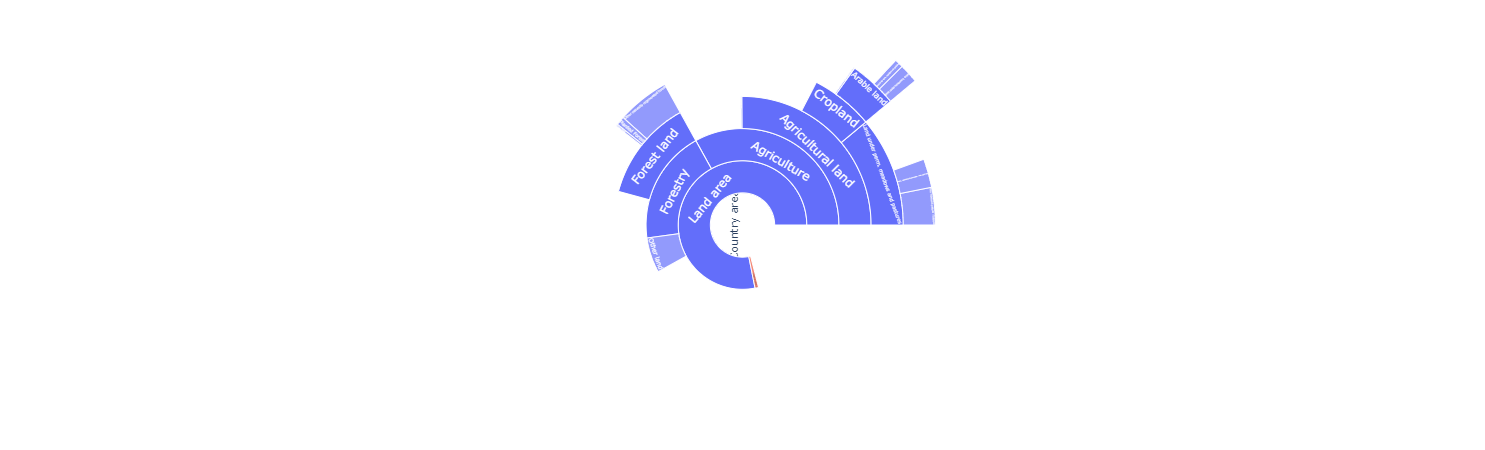

In [146]:
fig =go.Figure(go.Sunburst(
    labels=['Country area','Land area', 'Agriculture', 'Agricultural land', 'Cropland', 'Arable land', 'Land under temporary crops',
       'Land under temp. meadows and pastures', 'Land with temporary fallow', 'Land under permanent crops',
       'Land under perm. meadows and pastures', 'Perm. meadows & pastures - Cultivated',
       'Perm. meadows & pastures - Nat. growing', 'Land under protective cover', 'Forestry', 'Forest land',
       'Primary Forest', 'Other naturally regenerated forest', 'Planted Forest', 'Other land','Inland waters'],
    parents=['','Country area', 'Land area', 'Agriculture', 'Agricultural land', 'Cropland', 'Arable land',
       'Arable land', 'Arable land', 'Cropland', 'Agricultural land', 'Land under perm. meadows and pastures',
       'Land under perm. meadows and pastures', 'Agriculture', 'Land area', 'Forestry',
       'Forest land', 'Forest land', 'Forest land', 'Land area','Country area'],
    values=[4.1290390e+06, 3.9516030e+06, 1.5398066e+06, 1.5129990e+06,
       4.2308850e+05, 3.9818400e+05, 2.7100630e+05, 1.2422920e+05,
       2.9484000e+03, 2.4904500e+04, 1.0899105e+06, 6.1734310e+05,
       4.7256740e+05, 2.6807600e+04, 1.2540000e+06, 1.2540000e+06, 4.0000000e+04,
       1.0420000e+06, 1.7200000e+05, 1.1577964e+06, 1.7743600e+05],
))
# Update layout for tight margin
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

<div class="alert alert-block alert-success">

**Country area =** Land area + Inland waters
    
**Land area =** Forestry + Agriculture + Other lands

**Forestry =** Forest land
    
**Agriculture =** Land under protective cover + Agricultural land
    
**Forest land =** Primary forset + Planted forest + Other naturally regenerated forest
    
**Agricultural land =** Cropland + Land under perm. meadows and pastures
    
**Cropland =** Arable land + Land under permanent crops
    
**Land under perm. meadows and pastures =** Perm. meadows and pastures Cultivated + Perm. meadows and pastures Nat. growing
    
**Arable land =** Land under temp. meadows and pastures + Land under temporary crops + Land under temp. fallow
    

### <span style='background :gray' > - Switzerland land area and agricultral land distribution, year 2017 - </span>

**Dataset :** Land Use Area

**Data :** Area for different categories

**Notes :** None.


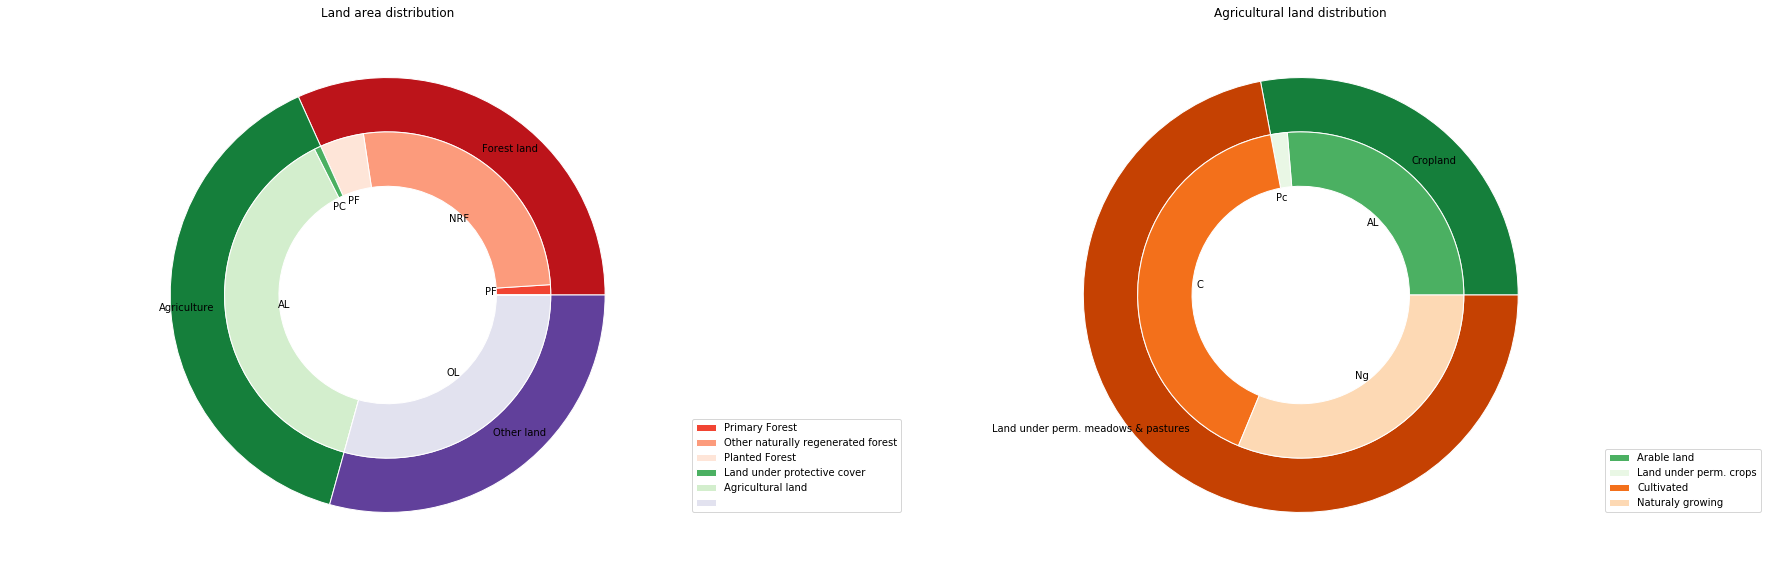

In [147]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

size = 0.25

cmap1 = plt.cm.Reds
cmap2 = plt.cm.Greens
cmap3 = plt.cm.Purples
cmap4 = plt.cm.Oranges

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8)]
inner_colors = [*cmap1(np.linspace(.6, .1, 3)), *cmap2(np.linspace(.6, .2, 2)), *cmap3(np.linspace(.6, .2, 2))]
labels_1o = ['Forest land','Agriculture','Other land']
labels_1 = ['PF','NRF','PF','PC','AL','','OL','','']
labels_1i = ['Primary Forest','Other naturally regenerated forest','Planted Forest','Land under protective cover','Agricultural land','','Other land','','']
vals1 = np.array([[40000,1042000,172000], [26807.6,1512999,0], [1157796.4,0,0]])

ax1.axis('equal')
ax1.pie(vals1.sum(axis=1), radius=1, colors=outer_colors,labels=labels_1o, labeldistance=0.8, wedgeprops=dict(width=size, edgecolor='w'))
ax1.pie(vals1.flatten(), radius=1-size, colors=inner_colors, labels=labels_1, labeldistance=0.6, wedgeprops=dict(width=size, edgecolor='w'))
plt.margins(0,0)
ax1.set(aspect="equal", title='Land area distribution')


labels_2o = ['Cropland','Land under perm. meadows & pastures']
labels_2 = ['AL','Pc','C','Ng']
labels_2i = ['Arable land','Land under perm. crops','Cultivated','Naturaly growing']
vals2 = np.array([[398184,24904.5], [617343.1,472567.4]])
              
ax2.axis('equal')
ax2.pie(vals2.sum(axis=1), radius=1, colors=[cmap2(.8), cmap4(.8)], labels=labels_2o, labeldistance=0.8, wedgeprops=dict(width=size, edgecolor='w'))
ax2.pie(vals2.flatten(), radius=1-size, colors=[*cmap2(np.linspace(.6, .1, 2)), *cmap4(np.linspace(.6, .2, 2))], labels=labels_2, labeldistance=0.6, wedgeprops=dict(width=size, edgecolor='w'))
plt.margins(0,0)
ax2.set(aspect="equal", title='Agricultural land distribution') 

fig.set_facecolor('white') #backgroung color
plt.legend(loc=(0.9, 0.1))

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[3:], labels_1i, loc=(0.9, 0.1))
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[2:], labels_2i, loc=(0.9, 0.1))

plt.show()


<div class="alert alert-block alert-success">

There are large parts of land that are unproper to agricultural use in Switzerland.    
Howerver, if Switzerland wanted to increase its area harvested, it could use all the fiels dedicated to animal husbandry (in a future were we would all be vegetarian), or at least make a better use of arable lands and/or land under permanent meadows and pastures (could be reduced a bit without much consequences).
    
    Should we estimate the rise in production if those lands were used for food production instead of animal husbandery?

### <span style='background :gray' > - Switzerland land area and agricultral land distribution, year 2016 - </span> 
#### <span style='background :red' > **Maybe to delete** car les chiffres sont moyens</span>  


**Dataset :** Land Use Indicators

**Data :** Land use and agricultural land use indicators

**Notes :** None.


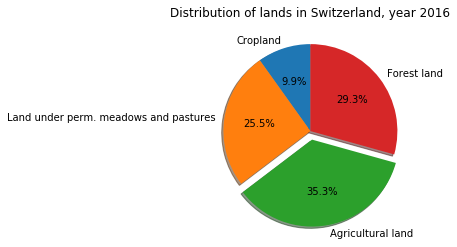

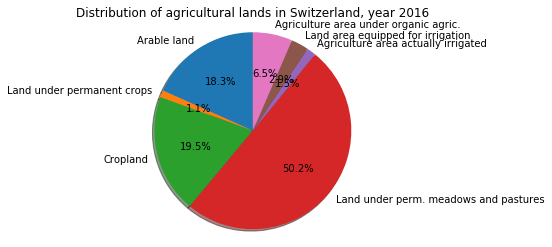

Domain         Area             Element  \
2975  Land use indicators  Switzerland  Share in Land area   
3087  Land use indicators  Switzerland  Share in Land area   
3202  Land use indicators  Switzerland  Share in Land area   
3229  Land use indicators  Switzerland  Share in Land area   

                                       Item  Year Unit  Value Flag Description  
2975                               Cropland  2016    %  10.72  Calculated data  
3087  Land under perm. meadows and pastures  2016    %  27.64  Calculated data  
3202                      Agricultural land  2016    %  38.36  Calculated data  
3229                            Forest land  2016    %  31.83  Calculated data

In [148]:
import matplotlib.pyplot as plt

# DataFrames to plot
df_land = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Land area']
df_agri = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Agricultural land']

# Pie plot #1
labels1 = df_land.Item
sizes1 = df_land.Value
explode = (0, 0, 0.1, 0)  # only "explode" the 3rd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Distribution of lands in Switzerland, year 2016')
fig1.set_facecolor('white')

# Pie plot #2
labels2 = df_agri.Item
sizes2 = df_agri.Value
fig1, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.title.set_text('Distribution of agricultural lands in Switzerland, year 2016')

# General settings
fig1.set_facecolor('white')
plt.show()
df_land

<div class="alert alert-block alert-info">

From the first graphes (distribution of lands) we can see that only 45,2% of Switzerland lands are used in agriculture compared to Frane, Italy or Germany where around 64% of lands are exploited in agriculture. Lands expoited in agriculture are the sum of cropland and agriculture land. We can see that the percentage of forest is quite similar between those three countries and that the main difference reside in the percentage of lands attribuated to meadows and pastures. For example France use half land less than Switzerland for meadows and pastures, Germany more than half less and Italy use only one third of what Switzerland attribute. We can deduce from these plots that Switzerland is more dedicated to dairy products and breeding. 
    When comparing Sxitzerland with Liechtenstein, we find more similarities as the percentage of land used in agriculture is 42,5%.
    From the second graphes (distribution of agricultural lands) we can see that the majority of Switzerland agricultural lands are under permanant meadows and pastures. This is a huge amount compared to the other countries which promote crop and arable lands. This suit our previous conviction than Switzerland is more dedicated to dairy products and breedings. We could hypothetize that Switzerland may be obligated to reduce this part of dedicated land to meadows and pastures in order to become food self efficient. This would also induce work  and policy transitions and impact the Swiss economy. 
    However an important aspect which is not shown by this data are the part of urban lands. We should add it to our analysis. 
    
ps: Arable lands are lands that can or are cultivable

### <span style='background :gray' > - Switzerland land cover, with artificial areas, year 2016 - </span>  


**Dataset :** Land Cover

**Data :** Ditribution of land between artificial and natural areas

**Notes :** This plot overlaps a bit the others, but contains additional information about atrificial areas.


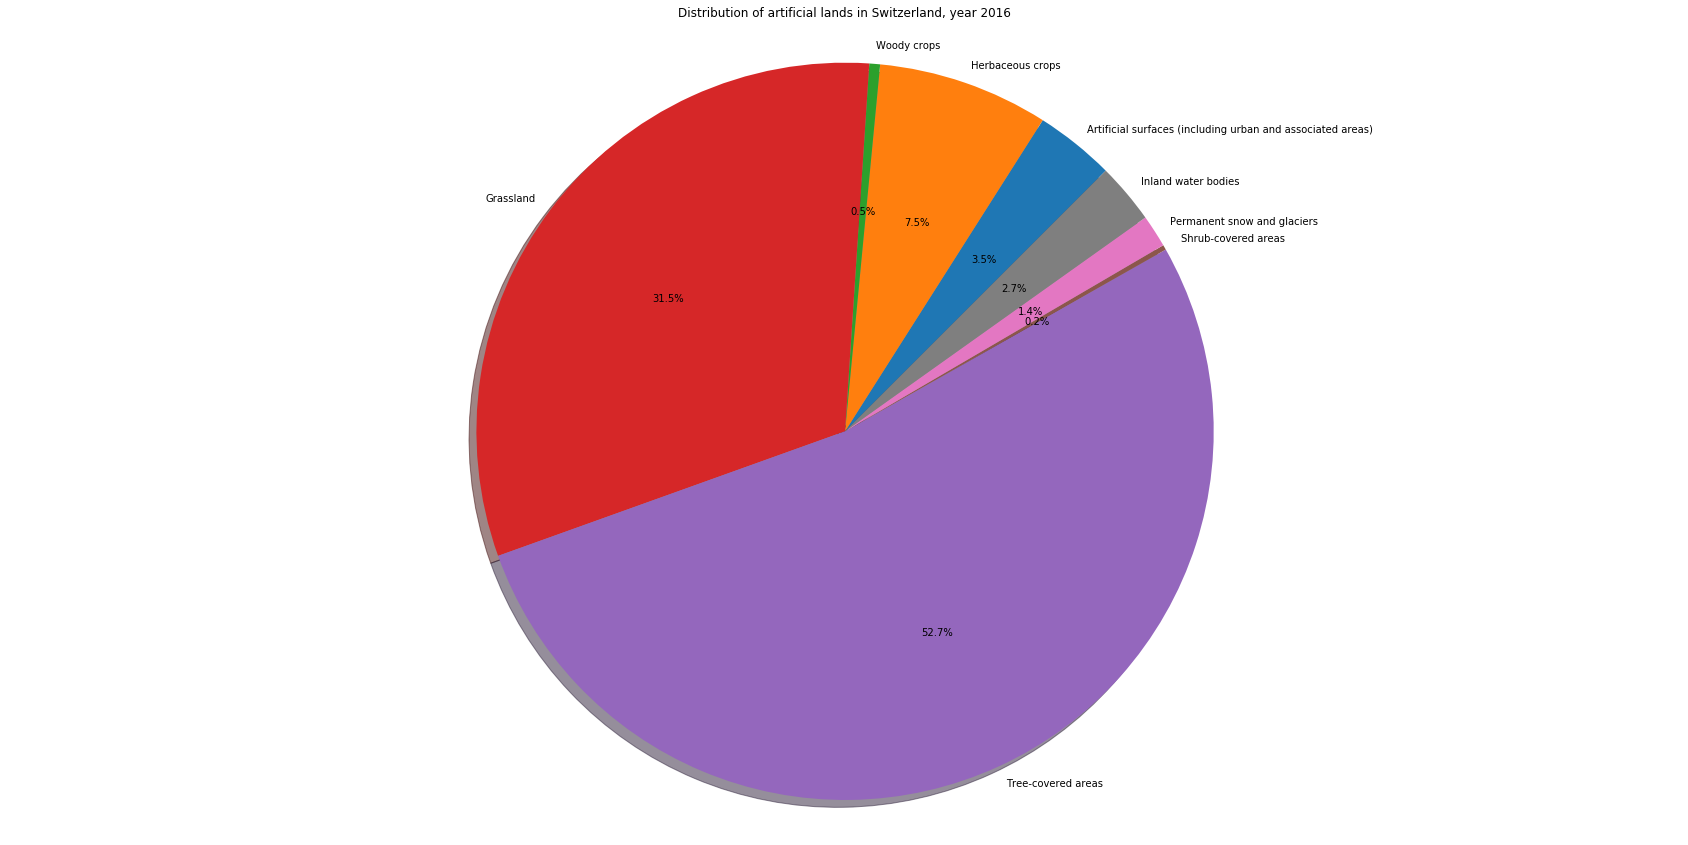

Domain         Area          Element  \
2885  Land Cover  Switzerland  Area from MODIS   
2926  Land Cover  Switzerland  Area from MODIS   
2967  Land Cover  Switzerland  Area from MODIS   
3049  Land Cover  Switzerland  Area from MODIS   
3090  Land Cover  Switzerland  Area from MODIS   
3172  Land Cover  Switzerland  Area from MODIS   
3336  Land Cover  Switzerland  Area from MODIS   
3377  Land Cover  Switzerland  Area from MODIS   

                                                   Item  Year Unit  \
2885  Artificial surfaces (including urban and assoc...  2016   ha   
2926                                   Herbaceous crops  2016   ha   
2967                                        Woody crops  2016   ha   
3049                                          Grassland  2016   ha   
3090                                 Tree-covered areas  2016   ha   
3172                                Shrub-covered areas  2016   ha   
3336                        Permanent snow and glaciers  2016   ha   
3377                                Inland water bodies  2016   ha   

     Flag Description    Surface  
2885  Calculated data   135557.0  
2926  Calculated data   290905.4  
2967  Calculated data    18276.2  
3049  Calculated data  1224520.4  
3090  Calculated data  2047342.7  
3172  Calculated data     8370.3  
3336  Calculated data    55339.0  
3377  Calculated data   103014.7

In [149]:
import matplotlib.pyplot as plt

# DataFrames to plot
df_artificial_surface = raw_land_cover_dataset.loc[raw_land_cover_dataset['Area']=='Switzerland'].loc[raw_land_cover_dataset['Year']==2016].loc[raw_land_cover_dataset['Element']=='Area from MODIS']
# Pie plot #1
labels1 = df_artificial_surface.Item
sizes1 = df_artificial_surface.Surface

fig1, ax1 = plt.subplots(figsize=(30,15))
ax1.pie(sizes1, labels=labels1, labeldistance=1.05, autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Distribution of artificial lands in Switzerland, year 2016')
fig1.set_facecolor('white')

# General settings
fig1.set_facecolor('white')
plt.show()
df_artificial_surface

<div class="alert alert-block alert-info">
    
        Comparison with neighbours:
    
In Switzerland, 60,5 % of the lands are not usable for agriculture (sum of artificial, inland water bodies,snow and tree-covered areas).
    
In France, 51 % of the lands are not usable for agriculture. 
    
In Germany, 52,6 %
    
In Italy only 41,7%
    
In Austria 66,8 %
    
In Leichtenstein: no datas
    
So compared to its neighbours Switzerland have one of the smallest ratio of usable lands for Agriculture but still manage to have the best yields. 
    
Now that we have the general distribution of lands for each country, lets focus our plots on the agriculture lands. 

<div class="alert alert-block alert-success">
    
    Around 60 % of Switzerland land are unusable for agriculture (sum of forests, shrub covered areas,  inland water bodies, permanent snow and glaciers and artificial surfaces). 
    Inland water bodies are lakes and  artificial areas are urban areas. 
    This percentage can be increased via deforestation but it is not in the Interest of the country for environmental issues. 

### <span style='background :gray' > - Domographic evolution of Switzerland over the years - </span>

**Dataset :** Demography

**Data :** Population for different countries over years

**Notes :** None.


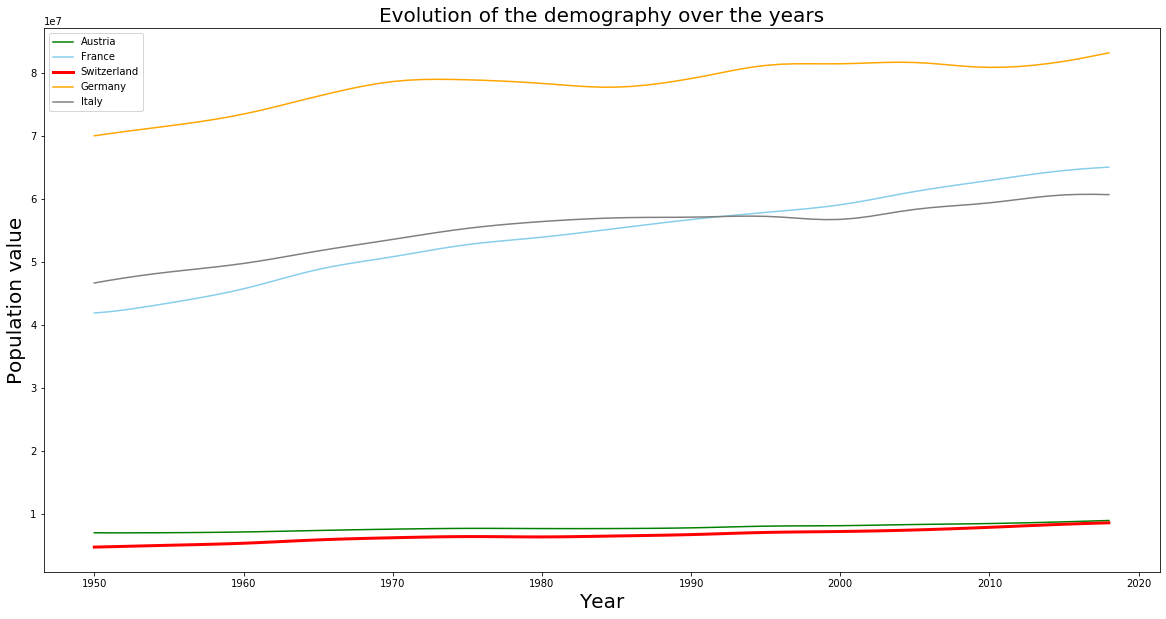

In [150]:
#plot of the evolution of the demography over the years

plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Austria'], marker='', color='green',  label = 'Austria')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='France'], marker='', color='skyblue', label = 'France')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Germany'], marker='', color='orange', label = 'Germany')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
plt.legend() 
plt.title('Evolution of the demography over the years' , fontsize= 20)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Population value", fontsize= 20)
plt.show()

In [151]:
min_swiss_demography = demography[demography.Area.str.contains('Switzerland')].Population.min()
min_swiss_demography

4668085.999999999

In [152]:
max_swiss_demography = demography[demography.Area.str.contains('Switzerland')].Population.max()
max_swiss_demography

8525610.999999998

In [153]:
delta_swiss_demography= max_swiss_demography - min_swiss_demography
delta_swiss_demography

3857524.999999999

<div class="alert alert-block alert-success">
    
We can see that as expected, the population is growing in every country. From 1950 to 2018 the swiss population has increased by 0,38*10^7 persons. It has allmost double, so if the wold's predictions about demographic growth reveal to be true for the next years, how could Switzerland become self-sufficcient? 
    

<div class="alert alert-block alert-warning">
    idea: we could make linear regression for each country so we get the slope of the demographic growth and we can compare and extrapolate it to further years for our predictive model? 

### <span style='background :gray' > - Production, exports and imports of items in Switzerland over years. - </span>

**Dataset :** Importaions/Exportations (CH)

**Data :** Importation and Exportations of different items 

**Notes :** This plot is interactive. It allows you to choose for an item (apples, berries..) and shows you its production, exportation and importation in Switzerland over years.


In [154]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = CH_data.loc[CH_data['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Produced Quantity', data=df_viz_evolution, marker='', color='red', label = 'production', linewidth=3)
    plt.plot('Year', 'Imported Quantity', data=df_viz_evolution, marker='', color='blue', label = 'imports', linewidth=3)
    plt.plot('Year', 'Exported Quantity', data=df_viz_evolution, marker='', color='green', label = 'exports', linewidth=3) 
    plt.legend() 
    plt.title(f'Production and imports of {item} in Switzerland throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values [tonnes]", fontsize= 20)
    plt.show()
   
items = CH_data.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Artichokes', 'Asparagus', '…

<function __main__.viz_evolution(item)>

**Most produced, imported and exported products :**

- Most produced crops products

In [155]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Produced Quantity', ascending = False).head(10)

Area                 Item     Element  Year    Unit  \
1191  Switzerland           Sugar beet  Production  2016  tonnes   
1402  Switzerland                Wheat  Production  2016  tonnes   
982   Switzerland             Potatoes  Production  2016  tonnes   
30    Switzerland               Apples  Production  2016  tonnes   
119   Switzerland               Barley  Production  2016  tonnes   
641   Switzerland                Maize  Production  2016  tonnes   
493   Switzerland               Grapes  Production  2016  tonnes   
1033  Switzerland             Rapeseed  Production  2016  tonnes   
245   Switzerland  Carrots and turnips  Production  2016  tonnes   
594   Switzerland  Lettuce and chicory  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1191          1277407.0               13.0            42914.0  
1402           386720.0             6491.0           484790.0  
982            372900.0             5245.0           104191.0  
30             227300.0             4157.0            11063.0  
119            159890.0              437.0            34152.0  
641            144406.0              181.0           165867.0  
493            136352.0               96.0            34096.0  
1033            71900.0               31.0            11978.0  
245             68433.0                0.0             4203.0  
594             65946.0               69.0            37433.0

- Most imported crops products

In [156]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Imported Quantity', ascending = False).head(10)

Area                   Item     Element  Year    Unit  \
1402  Switzerland                  Wheat  Production  2016  tonnes   
641   Switzerland                  Maize  Production  2016  tonnes   
982   Switzerland               Potatoes  Production  2016  tonnes   
729   Switzerland                   Oats  Production  2016  tonnes   
1191  Switzerland             Sugar beet  Production  2016  tonnes   
1280  Switzerland               Tomatoes  Production  2016  tonnes   
594   Switzerland    Lettuce and chicory  Production  2016  tonnes   
1338  Switzerland  Vegetables, fresh nes  Production  2016  tonnes   
119   Switzerland                 Barley  Production  2016  tonnes   
493   Switzerland                 Grapes  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1402           386720.0             6491.0           484790.0  
641            144406.0              181.0           165867.0  
982            372900.0             5245.0           104191.0  
729              7106.0                8.0            50129.0  
1191          1277407.0               13.0            42914.0  
1280            41907.0               95.0            38360.0  
594             65946.0               69.0            37433.0  
1338            49909.0               92.0            34772.0  
119            159890.0              437.0            34152.0  
493            136352.0               96.0            34096.0

- Most exported crops products

In [157]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Exported Quantity', ascending = False).head(10)

Area                     Item     Element  Year    Unit  \
1402  Switzerland                    Wheat  Production  2016  tonnes   
982   Switzerland                 Potatoes  Production  2016  tonnes   
30    Switzerland                   Apples  Production  2016  tonnes   
1248  Switzerland  Tobacco, unmanufactured  Production  2016  tonnes   
119   Switzerland                   Barley  Production  2016  tonnes   
746   Switzerland             Oilseeds nes  Production  2016  tonnes   
641   Switzerland                    Maize  Production  2016  tonnes   
1095  Switzerland                 Soybeans  Production  2016  tonnes   
609   Switzerland                  Linseed  Production  2016  tonnes   
1216  Switzerland           Sunflower seed  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
1402           386720.0             6491.0           484790.0  
982            372900.0             5245.0           104191.0  
30             227300.0             4157.0            11063.0  
1248             1013.0             1391.0            17182.0  
119            159890.0              437.0            34152.0  
746                66.0              228.0             1908.0  
641            144406.0              181.0           165867.0  
1095             4500.0              161.0            12695.0  
609               286.0              130.0             6945.0  
1216            13000.0              125.0             5213.0

In [158]:
total_export_quantity = CH_data["Exported Quantity"].sum()
total_export_quantity

454319.0

In [159]:
total_import_quantity = CH_data["Imported Quantity"].sum()
total_import_quantity

31796843.0

In [160]:
dv=total_import_quantity/total_export_quantity
dv

69.98792258303087

<div class="alert alert-block alert-success">
    
We can see that some of the most produced items are also some of the more imported like potatoes, wheat, maize, grappes, lettuce and chicory and sugar beet. This can show a high consumption of the item by the population and can indicate us that one of the priority could be to increase their production. In the more exported items, it is not suprising to find several items that are highly produced by Switzerland such as wheat, potatoes, apples, maise and Barley.  But we also find some strange items like oilseeds nes which are more imported than produced and then exported in a higher quantity than the one produce which indicates an economic advantage in this transition. 
    When summing the total amount of exported and imported products we can see that switzerland import 70 times more products. But is this in a transit goal ( see oilseeds ex) ? or for consumption? 

**Less produced, imported and exported products :**

- Less produced crops products

In [161]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Produced Quantity', ascending = True).head(10)

Area                             Item     Element  Year    Unit  \
656  Switzerland  Melons, other (inc.cantaloupes)  Production  2016  tonnes   
72   Switzerland                       Artichokes  Production  2016  tonnes   
524  Switzerland                             Hops  Production  2016  tonnes   
449  Switzerland                           Garlic  Production  2016  tonnes   
434  Switzerland                 Fruit, fresh nes  Production  2016  tonnes   
746  Switzerland                     Oilseeds nes  Production  2016  tonnes   
402  Switzerland                         Currants  Production  2016  tonnes   
665  Switzerland                           Millet  Production  2016  tonnes   
332  Switzerland                         Chestnut  Production  2016  tonnes   
824  Switzerland           Peaches and nectarines  Production  2016  tonnes   

     Produced Quantity  Exported Quantity  Imported Quantity  
656                0.0               21.0            26881.0  
72                 3.0                1.0             1514.0  
524               31.0               29.0              143.0  
449               34.0               18.0             3226.0  
434               35.0               25.0             6360.0  
746               66.0              228.0             1908.0  
402               66.0                NaN               89.0  
665              152.0                NaN             2861.0  
332              177.0               56.0             2676.0  
824              244.0               29.0            31303.0

<div class="alert alert-block alert-success">
    Does the less produced items corresponds to the most imported ones? 
    we can see that none of these items figured in the most imported ones.. is it related to the consumption trends of swiss people? Is it necessary to increase their production if they do not seems necessary? 
    The only ecxeption is Oilseed nes but as discussed previously they are also exported. 
    
    

- Less imported products

In [162]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Imported Quantity', ascending = True).head(10)

Area                           Item     Element  Year    Unit  \
402   Switzerland                       Currants  Production  2016  tonnes   
524   Switzerland                           Hops  Production  2016  tonnes   
1306  Switzerland                      Triticale  Production  2016  tonnes   
1003  Switzerland                        Quinces  Production  2016  tonnes   
918   Switzerland                    Peas, green  Production  2016  tonnes   
181   Switzerland  Broad beans, horse beans, dry  Production  2016  tonnes   
1370  Switzerland            Walnuts, with shell  Production  2016  tonnes   
72    Switzerland                     Artichokes  Production  2016  tonnes   
1127  Switzerland                        Spinach  Production  2016  tonnes   
746   Switzerland                   Oilseeds nes  Production  2016  tonnes   

      Produced Quantity  Exported Quantity  Imported Quantity  
402                66.0                NaN               89.0  
524                31.0               29.0              143.0  
1306            36178.0                2.0              333.0  
1003              390.0                5.0              427.0  
918              4398.0                1.0              632.0  
181              1691.0                0.0              983.0  
1370             2547.0                0.0             1139.0  
72                  3.0                1.0             1514.0  
1127            15483.0               17.0             1893.0  
746                66.0              228.0             1908.0

<div class="alert alert-block alert-success">
    Does the less imported items corresponds to the most produced and exported ones? which would suggest high sufficiency of the items. 
    we can see not math between the less imported and the most imported an produced items. 
    

- less exported crops products

In [163]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Exported Quantity', ascending = True).head(10)

Area                                Item     Element  Year  \
1370  Switzerland                 Walnuts, with shell  Production  2016   
562   Switzerland  Leeks, other alliaceous vegetables  Production  2016   
1065  Switzerland                                 Rye  Production  2016   
181   Switzerland       Broad beans, horse beans, dry  Production  2016   
245   Switzerland                 Carrots and turnips  Production  2016   
918   Switzerland                         Peas, green  Production  2016   
72    Switzerland                          Artichokes  Production  2016   
547   Switzerland                          Kiwi fruit  Production  2016   
347   Switzerland         Chillies and peppers, green  Production  2016   
309   Switzerland                            Cherries  Production  2016   

        Unit  Produced Quantity  Exported Quantity  Imported Quantity  
1370  tonnes             2547.0                0.0             1139.0  
562   tonnes            13668.0                0.0             3057.0  
1065  tonnes             8411.0                0.0             2780.0  
181   tonnes             1691.0                0.0              983.0  
245   tonnes            68433.0                0.0             4203.0  
918   tonnes             4398.0                1.0              632.0  
72    tonnes                3.0                1.0             1514.0  
547   tonnes              375.0                1.0            11612.0  
347   tonnes              725.0                1.0            32609.0  
309   tonnes             5685.0                1.0             3287.0

<div class="alert alert-block alert-success">

Are the less exported items the less produced and the more imported ones? 
    No similarities between the less produced and the less exported items, same for importations. 
    

<div class="alert alert-block alert-warning">

Idea: on pourrait faire des matrices de corrélations pour répondre à ces questions?

### <span style='background :gray' > - TITLE - </span>

**Dataset :** 

**Data :** 

**Notes :** 

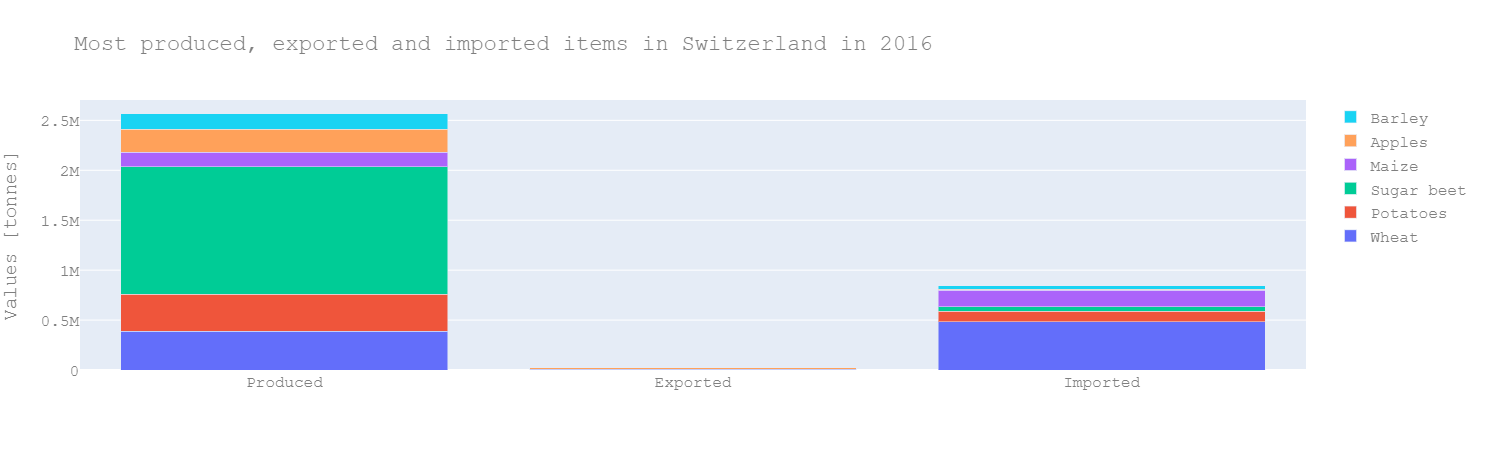

In [164]:
import plotly # conda install -c anaconda plotly #AND# jupyter labextension install @jupyterlab/plotly-extension
import plotly.graph_objects as go
y_wheat = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Wheat'].values[0,-3:]
y_potatoes = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Potatoes'].values[0,-3:]
y_beet = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Sugar beet'].values[0,-3:]
y_maize = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Maize'].values[0,-3:]
y_apples = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Apples'].values[0,-3:]
y_barley = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Barley'].values[0,-3:]

x=['Produced', 'Exported', 'Imported']
fig = go.Figure(go.Bar(x=x, y=y_wheat, name='Wheat'))
fig.add_trace(go.Bar(x=x, y=y_potatoes, name='Potatoes'))
fig.add_trace(go.Bar(x=x, y=y_beet, name='Sugar beet'))
fig.add_trace(go.Bar(x=x, y=y_maize, name='Maize'))
fig.add_trace(go.Bar(x=x, y=y_apples, name='Apples'))
fig.add_trace(go.Bar(x=x, y=y_barley, name='Barley'))

fig.update_layout(
    title='Most produced, exported and imported items in Switzerland in 2016',
    yaxis_title="Values [tonnes]",
    barmode='stack', 
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f")
    )
fig.show()

### <span style='background :gray' > - Plot production,  importation and exportation in Switzerland throughout years - </span>

**Dataset :** Importaions/Exportations (CH)

**Data :** Importation and Exportations of different items 

**Notes :** This plot is interactive. Shows values upon cursor selection. As reported before, values of exportations are much lower than those of production and importations. Hence, exportations values will now be plot separately, to better show their trend.


In [165]:
total_crops_imports = CH_data.groupby('Year').agg({'Produced Quantity':'sum', 'Exported Quantity':'sum', 'Imported Quantity':'sum'})

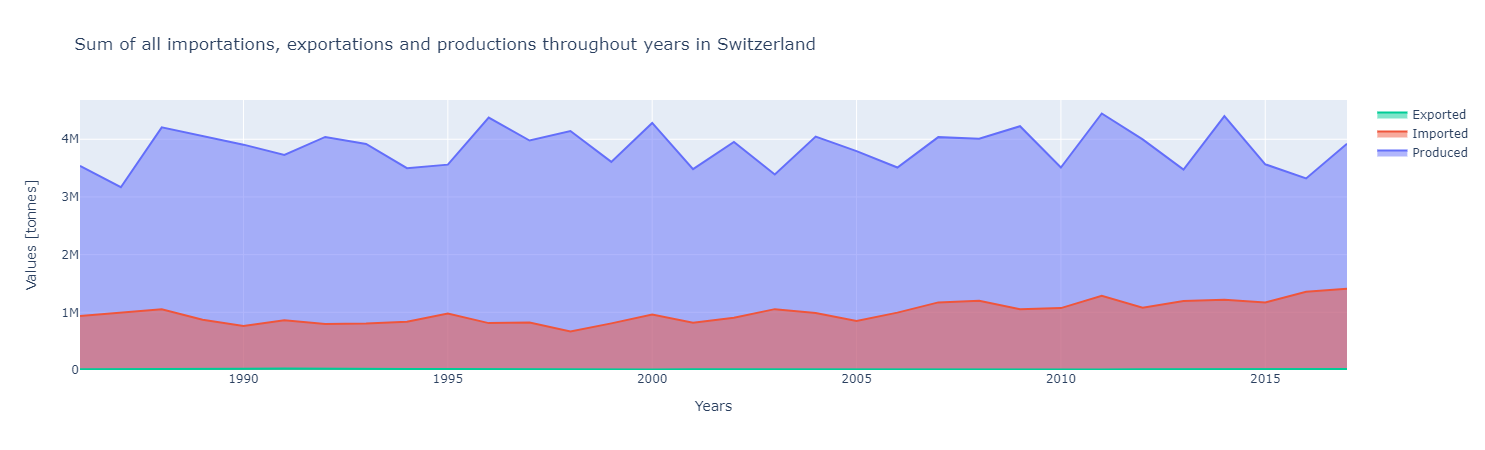

In [166]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Produced Quantity'].values, fill='tonexty', name='Produced')) # fill down to xaxis
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Imported Quantity'].values, fill='tozeroy', name='Imported')) # fill to trace0 y
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports['Exported Quantity'].values, fill='tozeroy', name='Exported'))
fig.update_layout(
    title="Sum of all importations, exportations and productions throughout years in Switzerland",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
fig.show()

<div class="alert alert-block alert-success">
    
Here again we can see that Switzerland is a very small exporter and is quite constant with its importations. Nevertheless, its importations seems to be slightly increasing since 2005. Is it because of demand for food diversity or because of production issues? Since The production values through years seems constantly varying we could follow the first hypothesis (ask for food diversity as a consequence of the mondialisation). 
    
    For the analysis + writing of report, I would say that:
        - CH is  a good player after all, since produces way more that imports (ratio 3:1)
        - For in raise in importations: I would say that a higher demand on diversity would not affect the curve since diversity does not mean quantity (actually we like chocolate but still eat more rice+ "common food products" ) --> To me it would rather reflect the fact that demography increases linearly and CH is ~cst in production = need to import more!

### <span style='background :gray' > -  Plot : Is there a correlation between production and temperature? - </span>

**Dataset :** Swiss temperatures

**Data :** 

**Notes :** 


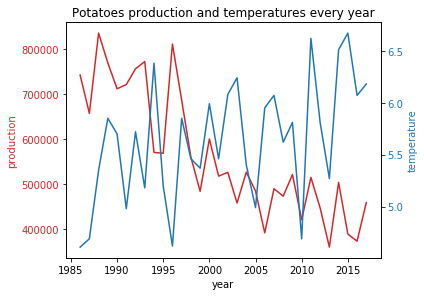

In [167]:
#we should make an interactive plot so we can select a food element and see how its production is affected
#by temperatures changes. 
years = np.sort(CH_data.Year.unique())
fig, ax1 = plt.subplots()
data1 = CH_data.loc[CH_data.Item=='Potatoes']['Produced Quantity']
data2 = CH_temperatures.year

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('production', color=color)
ax1.plot(years, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(years, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Potatoes production and temperatures every year')
plt.show()

<div class="alert alert-block alert-success">
As temperature increase, the production decrease. 


<div class="alert alert-block alert-info">
As temperature increase, the potatoes, maize and apples production decreases.
Wheat production is less affected by tempearture changes. 
Sugar beet production increase with temperatures, so this item need heat to be grown. 
    

### <span style='background :gray' > -   - </span>

**Dataset :**

**Data :** 

**Notes :** 


In [168]:
df_employ_newind = df_employ.copy()
df_employ_newind = df_employ.set_index(['area','indicator'])
df_employ_newind = df_employ_newind.sort_index()
df_employ_newind.head(2)

fao source  year  \
area    indicator                                                             
Austria Employment in agriculture  European Union Labour force survey  1995   
        Employment in agriculture  European Union Labour force survey  1996   

                                           unit  value flag  \
area    indicator                                             
Austria Employment in agriculture  1000 persons  270.0    X   
        Employment in agriculture  1000 persons  269.0    X   

                                                 flag description  \
area    indicator                                                   
Austria Employment in agriculture  International reliable sources   
        Employment in agriculture  International reliable sources   

                                                     note  
area    indicator                                          
Austria Employment in agriculture  EU Labour Force Survey  
        Employment in agriculture  EU Labour Force Survey

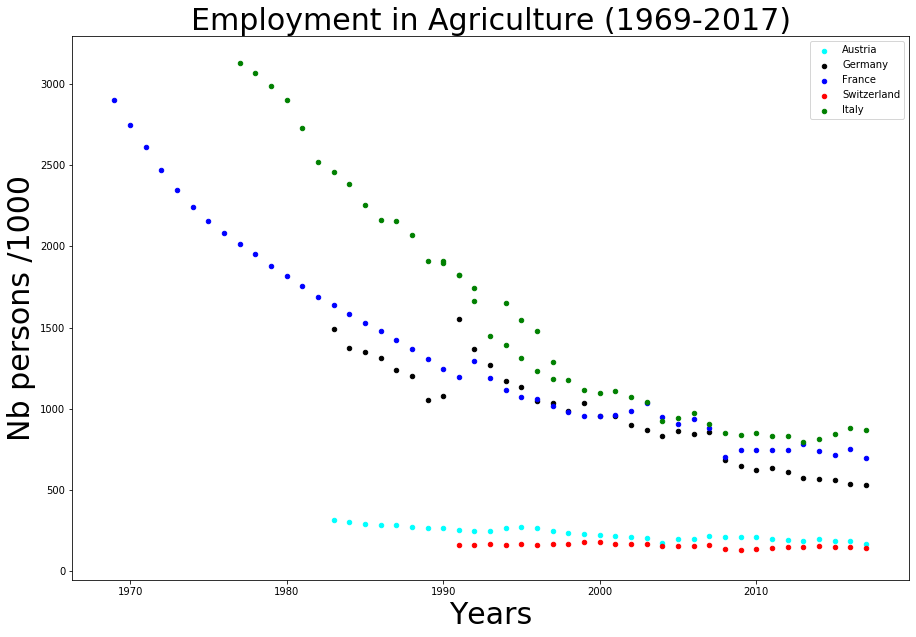

In [169]:
ax = plt.gca()
df_employ_newind.loc[('Austria','Employment in agriculture')].plot(kind='scatter',color='cyan',x='year',y='value',ax=ax, label='Austria')
df_employ_newind.loc[('Germany','Employment in agriculture')].plot(kind='scatter',color='black',x='year',y='value',ax=ax, label='Germany')
df_employ_newind.loc[('France','Employment in agriculture')].plot(kind='scatter',color='blue',x='year',y='value',ax=ax, label='France')
df_employ_newind.loc[('Switzerland','Employment in agriculture')].plot(kind='scatter',color='red',x='year',y='value',ax=ax, label='Switzerland')
df_employ_newind.loc[('Italy','Employment in agriculture')].plot(kind='scatter',color='green',x='year',y='value',ax=ax, label='Italy',
                                                                 figsize=(15,10))
ax.set(title='Employment in Agriculture (1969-2017)',
ylabel='Nb persons /1000',
xlabel='Years')
ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
plt.show()

<div class="alert alert-block alert-info">
    
Employment in agriculture are decreasing a lot in France, Germany and Italy but are constants in Austria and Switzerland. 
The number of employes in the agriculture sector are very small in Switzerland, only around 200 000 employes. why? 
    

### <span style='background :gray' > -  Plot :  - </span>

**Dataset :**

**Data :** 

**Notes :** 


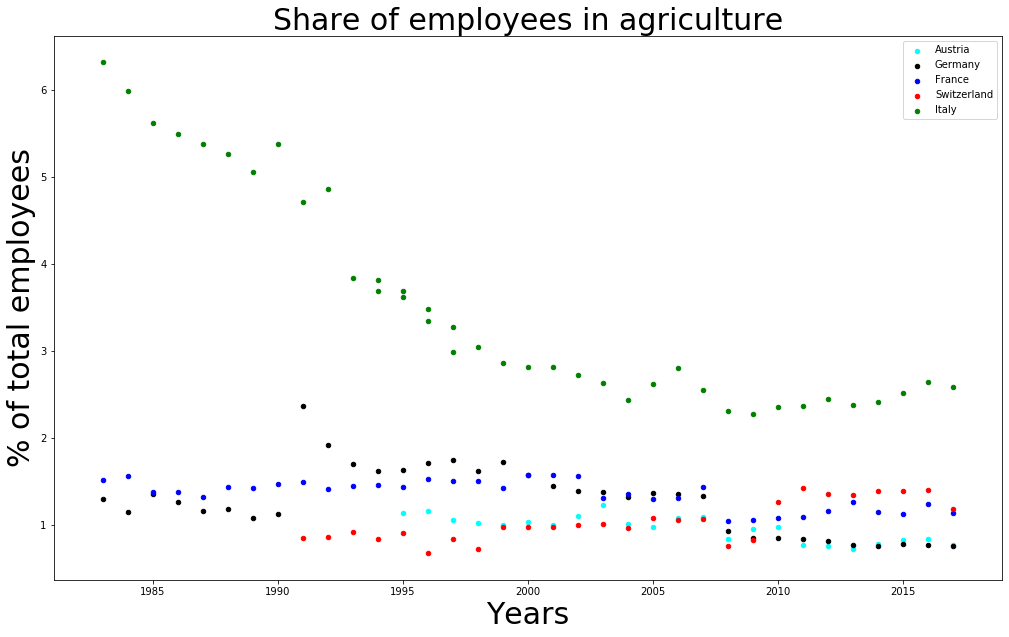

In [170]:
ax = plt.gca()
df_employ_newind.loc[('Austria','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='cyan',x='year',y='value',ax=ax, label='Austria')
df_employ_newind.loc[('Germany','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='black',x='year',y='value',ax=ax, label='Germany')
df_employ_newind.loc[('France','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='blue',x='year',y='value',ax=ax, label='France')
df_employ_newind.loc[('Switzerland','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='red',x='year',y='value',ax=ax, label='Switzerland')
df_employ_newind.loc[('Italy','Share of employees in agriculture (% of total employees)')].plot(kind='scatter',color='green',x='year',y='value',ax=ax, label='Italy',
                                                                                                figsize=(17,10))
ax.set(title='Share of employees in agriculture',
ylabel='% of total employees',
xlabel='Years')
ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
plt.show()

<div class="alert alert-block alert-info">
Agriculture represents a very small part employment, around 1%. But it is approximatively the same fo its neighbours: France Germany and Austria.
Only Italy has a relatively high percentage of employes in agriculture but it can be correlated with the fact that they also have the highest number of employees in this sector. 

### <span style='background :gray' > -  Plot :  - </span>

**Dataset :** 

**Data :** 

**Notes :** 


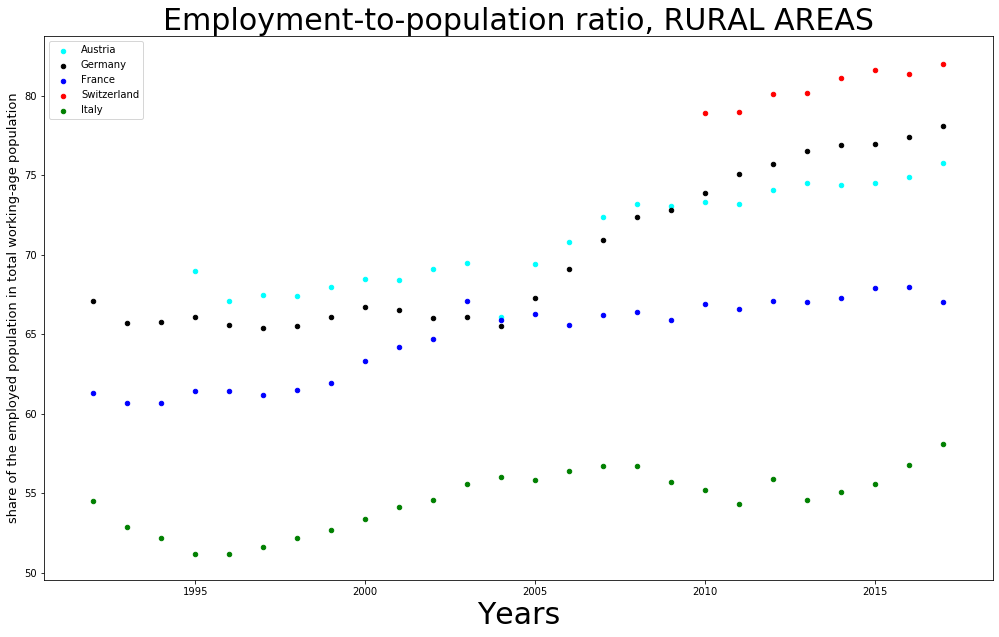

In [171]:
ax = plt.gca()
df_employ_newind.loc[('Austria','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='cyan',x='year',y='value',ax=ax, label='Austria')
df_employ_newind.loc[('Germany','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='black',x='year',y='value',ax=ax, label='Germany')
df_employ_newind.loc[('France','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='blue',x='year',y='value',ax=ax, label='France')
df_employ_newind.loc[('Switzerland','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='red',x='year',y='value',ax=ax, label='Switzerland')
df_employ_newind.loc[('Italy','Employment-to-population ratio, rural areas')].plot(kind='scatter',color='green',x='year',y='value',ax=ax, label='Italy',
                                                                                                figsize=(17,10))
ax.set(title='Employment-to-population ratio, RURAL AREAS',
ylabel='share of the employed population in total working-age population',
xlabel='Years')
ax.yaxis.label.set_size(13)
ax.xaxis.label.set_size(30)
ax.title.set_size(30)
plt.show()

<div class="alert alert-block alert-info">
When looking to the employment to population ration we can see that it is Switzerland that have the higher one, meaning that Switzerland have the biggest population part working in Agriculture. So Agriculture represents an important employment sector. 
We also remark that this ratio is increasing this past few years meaning that this work sector is attractive.

### <span style='background :gray' > -  Plot : Use of fertilizers and production over years in Switzerland - </span>

**Dataset :** fertilizers, pesticides and crops

**Data :** 

**Notes :** 


In [172]:
#Next : add the production for those years 
#Lest's try with CH:
fert_ch = fert_sum.loc[fert_sum['Area']=='Switzerland']

In [173]:
pest_ch = pesticides_dataset.loc[pesticides_dataset['Area']=='Switzerland'].loc[pesticides_dataset['Item']=='Pesticides (total)']
pest_ch = pest_ch[['Year','Value']]

In [174]:
prod_ch = crops_sum.loc[crops_sum['Element']== 'Production'].loc[crops_sum['Area']== 'Switzerland']

In [175]:
#pd.concat([prod_ch, fert_ch], sort=False).tail(60)
combo_ch = pd.merge(prod_ch, fert_ch, how='inner', on=['Year'])\
                .rename(columns={'Area_x':'Area'})\
                .rename(columns={'Sum_x':'Production'})\
                .rename(columns={'Sum_y':'Fertilizers'})\
                .drop(columns=['Area_y','Element'])

In [176]:
combo_ch = pd.merge(combo_ch, pest_ch, how='inner', on=['Year'])\
                .rename(columns={'Value':'Pesticides'})
combo_ch.head()

Area  Year  Production  Fertilizers  Pesticides
0  Switzerland  2002   3957861.0     200551.0     1526.60
1  Switzerland  2003   3394090.0     189820.0     1476.70
2  Switzerland  2004   4051477.0     202363.0     1390.70
3  Switzerland  2005   3800683.0     224610.0     1388.30
4  Switzerland  2006   3515845.0     221880.0     1359.04

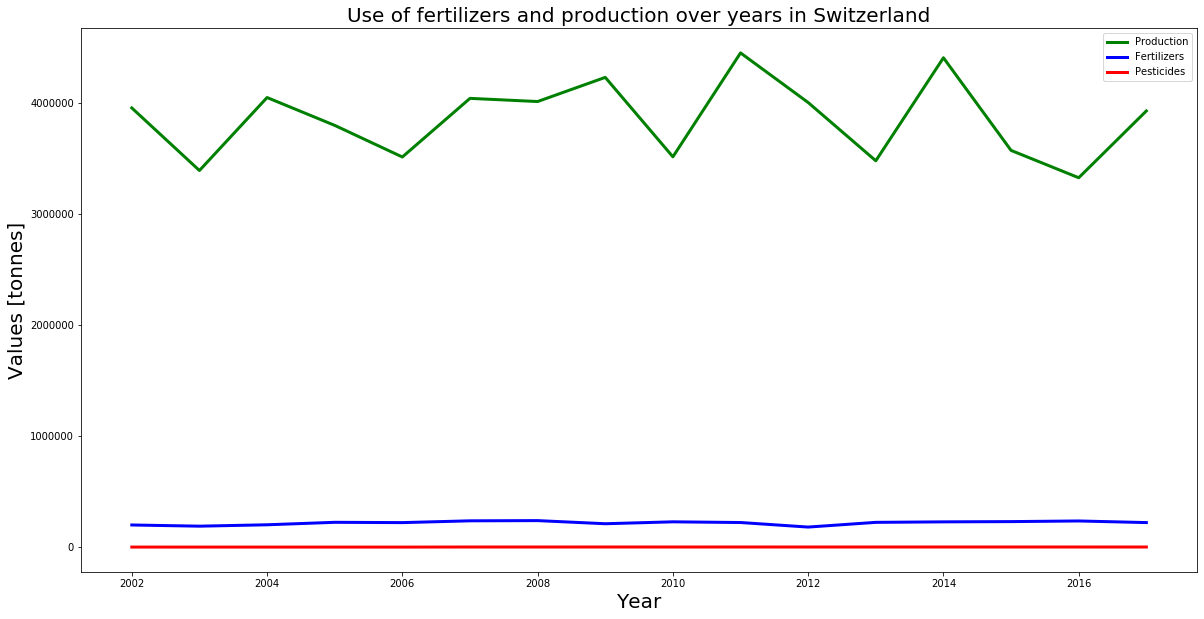

In [177]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Production', data=combo_ch, marker='', color='green', label = 'Production', linewidth=3)
plt.plot( 'Year', 'Fertilizers', data=combo_ch, marker='', color='blue', label = 'Fertilizers', linewidth=3)
plt.plot( 'Year', 'Pesticides', data=combo_ch, marker='', color='red', label = 'Pesticides', linewidth=3)
plt.legend() 
plt.title(f'Use of fertilizers and production over years in Switzerland', fontsize= 20)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Values [tonnes]", fontsize= 20)
plt.show()

# Main results

What's next:

<div class="alert alert-block alert-info">
    
1. Defining what is food self-sufficiency
    1. $ SSR = Production * 100 / (Production + Imports - Exports)$ to develop
    2. Addapt it to the Swiss case : take a look to what we import (basic needs ?), export (top exports ? by far ?) and production graphs
    3. __[Ref. Paper "Food self-sufficiency: Making sense of it, and when it makes sense" By Jennifer Clapp](https://www.sciencedirect.com/science/article/pii/S0306919216305851#b0240)__. <br> Résumé : __[Résumé par le site Resilience du paper de Clapp](https://www.resilience.org/stories/2018-03-13/food-self-sufficiency-does-it-make-sense/)__
    4. Compare our results with other sources just to know if we share the same results (e.g. selfsufficiency switzerland on wikipedia __[List of countries by food self-sufficieent rate](https://en.wikipedia.org/wiki/List_of_countries_by_food_self-sufficiency_rate)__)

    
2. Food situation of Switzerland from 1986 to 2017.
    1. Is/was it food self-sufficient ? SSR scores over the years.
    2. Comapre to neighbours

    
3. Will it be **physically** possible for Switzerland in a near future to be food self-sufficient (in the sense of the 2018 initiative bc we have seen that definition is relative) taking into account its population growth (hesimated increase in consumption computation)? What would it imply/take into account in terms of :
    1. Area harvested (actual ratio and estimation of its evolution)
    2. Farmers population 
    3. Temperature (climate impact food production correlation)
    4. Environment (use of fertilizers needed ? depends on productivity)

    
4. Attempt on **economy** consequences analysis ?
    1. Complicated ... What about looking at what happended in countries that adopted food self-sufficient policies such as Senegal, India, the Philippines, Qatar, Bolivia, and Russia ? (Jaccard and correlations?)
    2. Jaccard similarity of country based on SSR to see which country should adopt more food self-sufficient policies ?

## SSR score


##### <span style='background :gray' >Compute SSR for Switzerland and its neighbour over the years then plot - Analysis</span>

In [178]:
CH_clear = CH_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]

In [179]:
CH_ssr = CH_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()

CH_ssr.head()

Year  Produced Quantity  Exported Quantity  Imported Quantity
0  1986          3538992.0            15155.0           934853.0
1  1987          3168682.0            14455.0           991137.0
2  1988          4205999.0            15919.0          1053132.0
3  1989          4049588.0            21474.0           872169.0
4  1990          3906394.0            23144.0           765050.0

In [180]:
SSR_list=[]
for i in range(0, CH_ssr.shape[0]):
    SSR_list.append((CH_ssr["Produced Quantity"].iloc[i]*100)/(CH_ssr["Produced Quantity"].iloc[i] + CH_ssr["Imported Quantity"].iloc[i]-CH_ssr["Exported Quantity"].iloc[i]))

CH_ssr["SSR"]=SSR_list
CH_ssr.head()

Year  Produced Quantity  Exported Quantity  Imported Quantity        SSR
0  1986          3538992.0            15155.0           934853.0  79.372910
1  1987          3168682.0            14455.0           991137.0  76.439174
2  1988          4205999.0            15919.0          1053132.0  80.217985
3  1989          4049588.0            21474.0           872169.0  82.639880
4  1990          3906394.0            23144.0           765050.0  84.039197

Now we do the same for Switzerland's neighbours

In [181]:
France_clear = France_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
France_ssr = France_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_F=[]
for i in range(0, France_ssr.shape[0]):
    SSR_list_F.append((France_ssr["Produced Quantity"].iloc[i]*100)/(France_ssr["Produced Quantity"].iloc[i] + France_ssr["Imported Quantity"].iloc[i] - France_ssr["Exported Quantity"].iloc[i]))

France_ssr["SSR"]=SSR_list_F
France_ssr.head()


Year  Produced Quantity  Exported Quantity  Imported Quantity         SSR
0  1986        108190873.0         27087348.0          4467584.0  126.433880
1  1987        114537023.0         30440072.0          4828097.0  128.801756
2  1988        117694519.0         32079294.0          4484084.0  130.627549
3  1989        117449610.0         32688367.0          4395886.0  131.733280
4  1990        119342357.0         34106351.0          4638502.0  132.787772

In [182]:
Germany_clear = Germany_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
Germany_ssr = Germany_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_G=[]
for i in range(0, Germany_ssr.shape[0]):
    SSR_list_G.append((Germany_ssr["Produced Quantity"].iloc[i]*100)/(Germany_ssr["Produced Quantity"].iloc[i] + Germany_ssr["Imported Quantity"].iloc[i]-France_ssr["Exported Quantity"].iloc[i]))

Germany_ssr["SSR"]=SSR_list_G
Germany_ssr.head()



Year  Produced Quantity  Exported Quantity  Imported Quantity         SSR
0  1986         90164599.0           400170.0         10441007.0  122.642458
1  1987         86621585.0          1863325.0          9229400.0  132.426809
2  1988         89714621.0          4956621.0         10975554.0  130.758591
3  1989         86623133.0          4538105.0         10929356.0  133.545526
4  1990         56532533.0          2128550.0          4434529.0  210.465512

In [183]:
Italy_clear = Italy_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
Italy_ssr = Italy_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_I=[]
for i in range(0, Italy_ssr.shape[0]):
    SSR_list_I.append((Italy_ssr["Produced Quantity"].iloc[i]*100)/(Italy_ssr["Produced Quantity"].iloc[i] + Italy_ssr["Imported Quantity"].iloc[i] - Italy_ssr["Exported Quantity"].iloc[i]))

Italy_ssr["SSR"]=SSR_list_I
Italy_ssr.head()



Year  Produced Quantity  Exported Quantity  Imported Quantity        SSR
0  1986         73568463.0          3341667.0         10339104.0  91.314642
1  1987         73918906.0          3127890.0         10599226.0  90.820354
2  1988         68670196.0          3904146.0         10085673.0  91.741637
3  1989         73236415.0          4074512.0         10853833.0  91.527515
4  1990         64918230.0          3067563.0          9856845.0  90.531979

In [184]:
Austria_clear = Austria_data[["Year", "Produced Quantity", "Exported Quantity", "Imported Quantity"]]
Austria_ssr = Austria_clear.groupby("Year")\
                .agg({'Produced Quantity':'sum','Exported Quantity':'sum','Imported Quantity':'sum'})\
                .reset_index()
SSR_list_A=[]
for i in range(0, Austria_ssr.shape[0]):
    SSR_list_A.append((Austria_ssr["Produced Quantity"].iloc[i]*100)/(Austria_ssr["Produced Quantity"].iloc[i] + Austria_ssr["Imported Quantity"].iloc[i] - Austria_ssr["Exported Quantity"].iloc[i]))

Austria_ssr["SSR"]=SSR_list_A
Austria_ssr.head()




Year  Produced Quantity  Exported Quantity  Imported Quantity         SSR
0  1986          9204092.0          1063274.0           418449.0  107.533647
1  1987          9420306.0           918527.0           449514.0  105.239612
2  1988         10195349.0          1366136.0           453154.0  109.835659
3  1989         10124379.0          1141683.0           442441.0  107.418905
4  1990         10251970.0          1100715.0           480437.0  106.439969

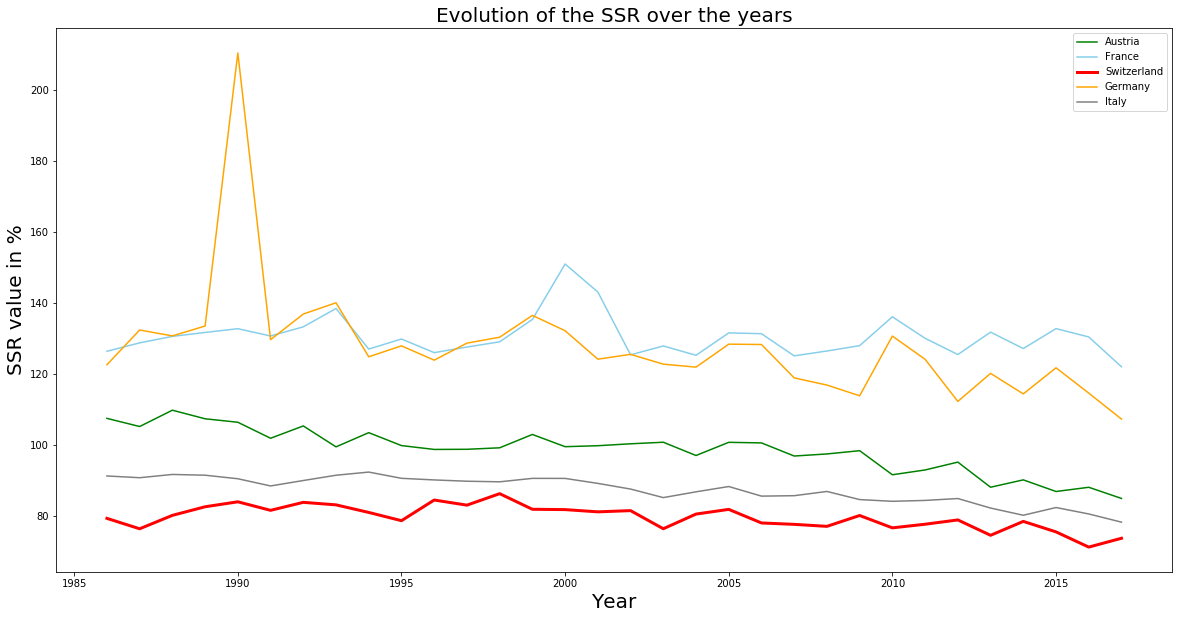

In [185]:
#plot of the evolution of the demography over the years
from scipy.stats import linregress

plt.figure(figsize=(20,10))
plt.plot( 'Year', 'SSR', data=Austria_ssr, marker='', color='green',  label = 'Austria')
plt.plot( 'Year', 'SSR', data=France_ssr, marker='', color='skyblue', label = 'France')
plt.plot( 'Year', 'SSR', data=CH_ssr, marker='', color='red', label = 'Switzerland', linewidth=3)
plt.plot( 'Year', 'SSR', data=Germany_ssr, marker='', color='orange', label = 'Germany')
plt.plot( 'Year', 'SSR', data=Italy_ssr, marker='', color='grey', label = 'Italy')
    
plt.legend() 
plt.title('Evolution of the SSR over the years' , fontsize= 20)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("SSR value in %", fontsize= 20)
plt.show()

<div class="alert alert-block alert-info">
    
We can see that Switzerland has the smallers SSR ratio. It oscillates between 90 and 70% over the years.
This indicates that Switzerland has never been food self-sufficient.
We can also observe that Germany, France and sometimes Austria have SSR superior than 100% this can be explained by the fact that our dataset contains mostly items producted in our country so we are missing a lot of importations. Mathematically this means that those countries have high exports value and low import values. 
    
We will now try to recompute those SSR with only our 5 main items:
    potatoes, Wheat, Sugar beet, apples and maize. 